# Nouvelle approche par motifs

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

import warnings
warnings.filterwarnings('ignore')

## Approche

**Explication des differente matrice a notre disposition** :
- 1 matrice exprimant quel gènes sont exprimés (negativement : -1, positivement : 1) significativement pour chaque condition.

In [2]:
complete_data = pd.read_csv("data/expression_final.csv", index_col=0)
complete_data.head()

,1101,1104,29,30,1977,1973,1980,1976,1978,1974,...,1563,796,797,799,800,798,801,1296,1677,1672
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
AT1G01010,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0
AT1G01030,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AT1G01040,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AT1G01050,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
AT1G01060,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,-1.0,0.0,0.0,-1.0,-1.0


- 1 matrice bouléenne présentant la présence ou non de plm pour chaque gène

In [3]:
PLM_final = pd.read_csv("data/PLM_final.csv", index_col=0)

PLM_final = pd.DataFrame(np.where(PLM_final == 1, True, False), index=PLM_final.index, columns=PLM_final.columns)

PLM_final.head()

,WMCAATAATTRW_-317,TGTAAAGT_-280,CCAATGT_-275,GGATA_-263,TAACAAA_-261,HDTTAACAGAAWW_-260,AWTTAAWT_-239,RTTTTTR_-229,TATCCA_-226,GRWAAW_-212,...,SAGATCYRR_295,DYCACCGACAHH_312,GTGGWWHG_319,AGATCCAA_326,HYRGATCYRD_334,ATGTCGGYRR_344,YAGATCTR_353,CTGACY_367,ACNGCT_426,AGCAGC_444
AT1G01010,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
AT1G01030,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
AT1G01040,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
AT1G01050,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
AT1G01060,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,True,True


## Tranformation de matrice

Ajout de label aux conditions de la matrice d'expression

In [4]:
Info_allswap = pd.read_table("data/Info-allswap.txt")
Info_allswap["uniq_name"] = Info_allswap[['StressName', 'swap_name']].agg('__'.join, axis=1)

replace_col = {str(k): Info_allswap[Info_allswap["swap_id"] == k]["uniq_name"].values.tolist()[0] for k in Info_allswap["swap_id"]}

complete_data = complete_data.rename(replace_col, axis=1)

On va séparer la matrice d'expression des gènes en separant l'expression significative positive et négative des gène.

In [5]:
plus_data = np.where(complete_data == 1, True, False)
plus_data = pd.DataFrame(plus_data, index=complete_data.index, columns=complete_data.columns)
plus_data.head()

,DROUGHT__Total_RNA_Drought_1 / Total_RNA_Control_1,DROUGHT__Total_RNA_Drought_2 / Total_RNA_Control_2,DROUGHT__Col0_stress / Col0,DROUGHT__35S_HAHB4_stress / 35S_HAHB4,DROUGHT__Col0_M_1 / Col0_control_1,DROUGHT__Col0_M_2 / Col0_control_2,DROUGHT__W498_M_1 / Col0_M_1,DROUGHT__W498_M_2 / Col0_M_2,DROUGHT__W498_M_1 / W498_control_1,DROUGHT__W498_M_2 / W498_control_2,...,VIRUS__LMV_Bl1_2 / Bl1_Control_2,VIRUS__CaMV_Col0 / Col0_Control,VIRUS__CaMV_dcl2_dcl3 / CaMV_Col0,VIRUS__CaMV_dcl2_dcl4 / CaMV_Col0,VIRUS__CaMV_dcl3_dcl4 / CaMV_Col0,VIRUS__CaMV_dcl2_dcl3_dcl4 / CaMV_Col0,VIRUS__CaMV_dcl2_dcl3_dcl4 / dcl2_dcl3_dcl4_Control,VIRUS__TCV_G1_Col0_2 / G1_Col0_2,VIRUS__TCV_G11_Col0_1 / G11_Col0_1,VIRUS__TCV_G11_dcl2_dcl3_dcl4_1 / G11_dcl2_dcl3_dcl4_1
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
AT1G01010,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,True,True,True
AT1G01030,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
AT1G01040,False,False,False,False,False,False,False,False,False,False,...,False,True,False,False,False,False,False,False,False,False
AT1G01050,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
AT1G01060,False,False,True,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [6]:
minus_data = np.where(complete_data == -1, True, False)
minus_data = pd.DataFrame(minus_data, index=complete_data.index, columns=complete_data.columns)
minus_data.head()

,DROUGHT__Total_RNA_Drought_1 / Total_RNA_Control_1,DROUGHT__Total_RNA_Drought_2 / Total_RNA_Control_2,DROUGHT__Col0_stress / Col0,DROUGHT__35S_HAHB4_stress / 35S_HAHB4,DROUGHT__Col0_M_1 / Col0_control_1,DROUGHT__Col0_M_2 / Col0_control_2,DROUGHT__W498_M_1 / Col0_M_1,DROUGHT__W498_M_2 / Col0_M_2,DROUGHT__W498_M_1 / W498_control_1,DROUGHT__W498_M_2 / W498_control_2,...,VIRUS__LMV_Bl1_2 / Bl1_Control_2,VIRUS__CaMV_Col0 / Col0_Control,VIRUS__CaMV_dcl2_dcl3 / CaMV_Col0,VIRUS__CaMV_dcl2_dcl4 / CaMV_Col0,VIRUS__CaMV_dcl3_dcl4 / CaMV_Col0,VIRUS__CaMV_dcl2_dcl3_dcl4 / CaMV_Col0,VIRUS__CaMV_dcl2_dcl3_dcl4 / dcl2_dcl3_dcl4_Control,VIRUS__TCV_G1_Col0_2 / G1_Col0_2,VIRUS__TCV_G11_Col0_1 / G11_Col0_1,VIRUS__TCV_G11_dcl2_dcl3_dcl4_1 / G11_dcl2_dcl3_dcl4_1
Unnamed: 0,,,,,,,,,,,,,,,,,,,,,
AT1G01010,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
AT1G01030,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
AT1G01040,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
AT1G01050,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
AT1G01060,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,True,False,False,True,True


## Extraction d'une matrice de presence de PLM par condition

Pour permettre de faire le lien entre la matrice d'expression des gène (positive ou negative) et la matrice de presence de presence de PLM par gene, voici la demarche :
- On prend la liste des genes exprimé significativement pour une condition donnée
- On filtre la matrice de presence par cette liste de gène
- On renvoie cette matrice de presence de PLM pour cette condition (donc sur sa population de gène)

In [7]:
# Creation de sa fonction associé
def cond_PLM_Pres_creat(stress, data):
    list = data[data[stress]][stress].index
    
    return PLM_final[PLM_final.index.isin(list)]

In [8]:
d = cond_PLM_Pres_creat("DROUGHT__Col0_stress / Col0", plus_data)
d

,WMCAATAATTRW_-317,TGTAAAGT_-280,CCAATGT_-275,GGATA_-263,TAACAAA_-261,HDTTAACAGAAWW_-260,AWTTAAWT_-239,RTTTTTR_-229,TATCCA_-226,GRWAAW_-212,...,SAGATCYRR_295,DYCACCGACAHH_312,GTGGWWHG_319,AGATCCAA_326,HYRGATCYRD_334,ATGTCGGYRR_344,YAGATCTR_353,CTGACY_367,ACNGCT_426,AGCAGC_444
AT1G01060,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,True,True
AT1G01250,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,True,True
AT1G02205,False,False,False,True,False,False,False,False,False,True,...,True,False,False,True,False,False,False,False,False,False
AT1G04770,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,True
AT1G05170,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,True,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
AT5G65720,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,True,False,False,False,True,True
AT5G65830,False,False,False,False,False,False,False,True,False,True,...,True,False,False,False,True,False,True,False,False,False
AT5G67330,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,False,False,False,False,False,False
AT5G67360,False,False,False,False,False,False,False,False,False,True,...,False,False,False,False,True,False,True,False,True,False


### Verification des conditions (conditions sans PLM)

In [9]:
cond = plus_data.columns
cond_no_PLM = []
len_trans = []

for c in cond:
    list = plus_data[plus_data[c]][c].index
    data = PLM_final[PLM_final.index.isin(list)]
    if data.empty :
        cond_no_PLM.append(c)
    len_trans.append(data.shape[0])

cond_no_PLM

['TEMPERATURE__Fb1_4Celsius_2h / Col0_4Celsius_2h',
 'BIOTROPHIC.BACTERIA__fls2KO_flg22_30min / fls2KO_flg22_20min',
 'BIOTROPHIC.BACTERIA__fls2KO_flg22_60min / fls2KO_flg22_30min',
 'VIRUS__TEV_leaf_sys_1 / Control_leaf_sys_1',
 'VIRUS__TEV_leaf_sys_2 / Control_leaf_sys_2']

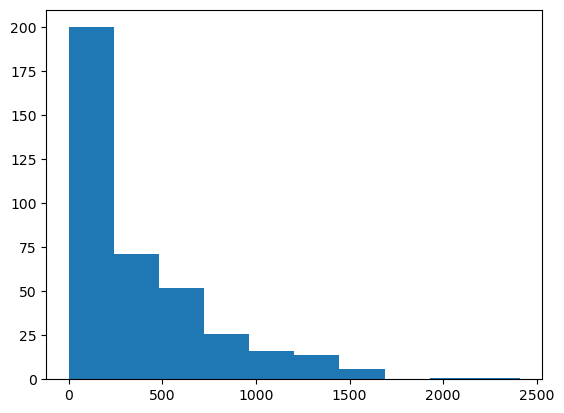

In [10]:
plt.figure()
plt.hist(len_trans)
plt.show()

Que faire ?
- On les retire si l'absence de PLM n'est pas importante (pour absolue)
- On les garde et les fixes a 0 (pour brut)

## Application d'une recherche de motifs significant

Ce que l'on souhaite faire  
=> Extraire des motifs de plm d'une condition, tels que la proportion du PLM dans la condition regarder est differente de celle de la population general

**Principe de l'utilité** :
Prenons f_C(PLM), la fréquence du PLM dans une condition particulière (nombre de fois présent dans les gène de la condition / nombre de gène de la condition)
Prenons f(PLM), la fréquence du PLM peu importe la condition (nombre de fois présent dans les gène / nombre de gène)

On fait *f_C(PLM) - f(PLM)* 

On va voir a quoi ressemble ces données

Restriction (ou non) au niveau des algorithme et impact sur l'utilité :
- Valeurs brut : **Prendre en compte impact d'absence et présence de PLM**
- Valeurs absolue : **Prendre en compte impact seulement la présence de PLM**
    - Prendre l'absolue
- Valeurs entière : **Prendre en compte impact d'absence et présence de PLM** + pour algo entier
    - Troncage des valeurs a 10^-4 
    - Accentuer les écarts entre les valeurs => Prendre l'écart entre les valeurs qui est la plus faible et pour chaque transaction regarder combien de fois elle se repete 
- Valeurs positive et entiere : **Prendre en compte impact seulement la présence de PLM** + pour algo entier

On va regarder, pour le troncage, où pourrait-il etre effectuer et si c'est possible  
Pour chaque condition on va regarder jusqu'a ou il y a la decimale.

### Help Function

num_zeroes_after_point => Compté le nombre de zero derriere la virgule

In [11]:
def num_zeroes_after_point(x):
    str_x = f"{x:.10f}"
    if '.' not in str_x:
        return 0
    fractional_part = str_x.split('.')[1]
    
    count = 0
    for char in fractional_part:
        if char == '0':
            count += 1
        else:
            break

    return count

flatten_chain => Transformé une matrix en list

In [12]:
def flatten_chain(matrix):
    res = []
    for i in range(matrix.shape[0]):
        for j in range(matrix.shape[1]):
            res.append(matrix[i,j])
    return res

### Test sur valeur brut

In [13]:
cond = plus_data.columns
zeros_count_all = {x: [] for x in cond}
value_all = {x: [] for x in cond}

for c in cond:
    list = plus_data[plus_data[c]][c].index
    PLM_1 = PLM_final[PLM_final.index.isin(list)]
    if PLM_1.empty :
        utility = 0 - (PLM_final.sum(axis=0) / PLM_final.shape[0])
    else :
        utility = (PLM_1.sum(axis=0) / PLM_1.shape[0]) - (PLM_final.sum(axis=0) / PLM_final.shape[0])
    
    for u in utility.index:
        value_all[c].append(utility[u])
        zeros_count_all[c].append(num_zeroes_after_point(utility[u]))

In [14]:
value_all = flatten_chain(np.array([*value_all.values()]))
value_all = np.array(value_all)
pd.DataFrame(value_all).describe()

,0
count,68886.000000
mean,0.001833
std,0.039829
min,-0.994243
25%,-0.005479
50%,-0.000511
75%,0.008067
max,0.640171


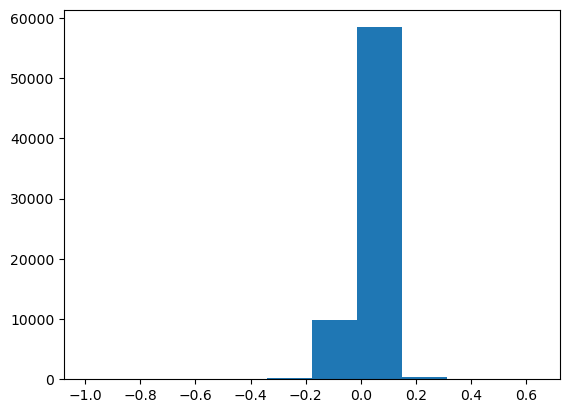

In [15]:
plt.figure()
plt.hist(value_all)
plt.show()

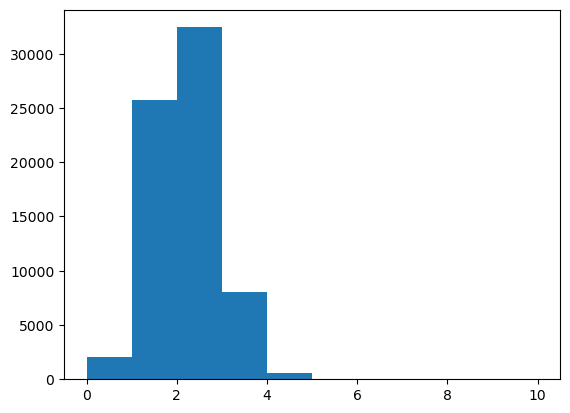

In [16]:
all_zeros = flatten_chain(np.array([*zeros_count_all.values()]))

plt.figure()
plt.hist(all_zeros)
plt.show()

### Test sur valeur absolue

In [17]:
cond = plus_data.columns
zeros_count_all = {x: [] for x in cond}
value_all = {x: [] for x in cond}

for c in cond:
    list = plus_data[plus_data[c]][c].index
    PLM_1 = PLM_final[PLM_final.index.isin(list)]
    if PLM_1.empty :
        continue
    utility = np.abs((PLM_1.sum(axis=0) / PLM_1.shape[0]) - (PLM_final.sum(axis=0) / PLM_final.shape[0]))
    
    for u in utility.index:
        value_all[c].append(utility[u])
        zeros_count_all[c].append(num_zeroes_after_point(utility[u]))

zeros_count_all = {k:v for k,v in zeros_count_all.items() if v}
value_all = {k:v for k,v in value_all.items() if v}

In [18]:
value_all = flatten_chain(np.array([*value_all.values()]))
value_all = np.array(value_all)
pd.DataFrame(value_all).describe()

,0
count,67996.000000
mean,0.017495
std,0.030415
min,0.000000
25%,0.002287
50%,0.006525
75%,0.019408
max,0.640171


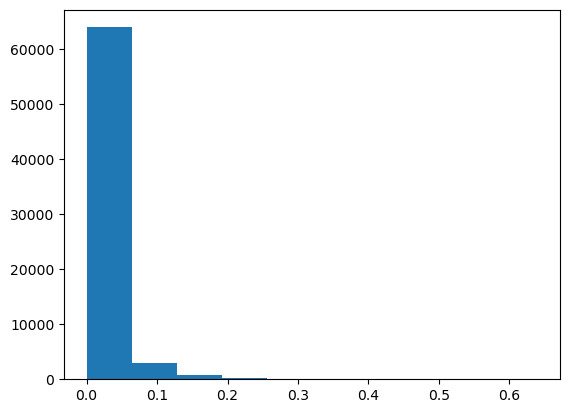

In [19]:
plt.figure()
plt.hist(value_all)
plt.show()

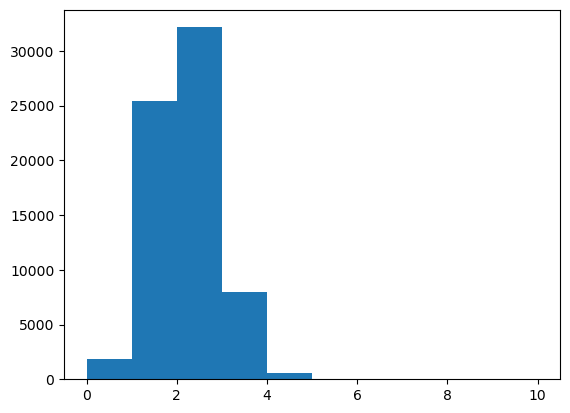

In [20]:
all_zeros = flatten_chain(np.array([*zeros_count_all.values()]))

plt.figure()
plt.hist(all_zeros)
plt.show()

### Test sur valeur entiere

#### Quel valeur de tronc

In [21]:
from math import trunc

cond = plus_data.columns
zeros_count_all = {x: [] for x in cond}
value_all = {x: [] for x in cond}

for c in cond:
    list = plus_data[plus_data[c]][c].index
    PLM_1 = PLM_final[PLM_final.index.isin(list)]
    if PLM_1.empty :
        utility = 0 - (PLM_final.sum(axis=0) / PLM_final.shape[0])
    else :
        utility = (PLM_1.sum(axis=0) / PLM_1.shape[0]) - (PLM_final.sum(axis=0) / PLM_final.shape[0])
    
    for u in utility.index:
        utility[u] = round(utility[u], 4) # Faire ça ici ou le faire dans utility trans tot (celui selectionner)
        
        value_all[c].append(utility[u])
        zeros_count_all[c].append(num_zeroes_after_point(utility[u]))

In [22]:
value_all = flatten_chain(np.array([*value_all.values()]))
value_all = np.array(value_all)
value_all_nozero = value_all[np.where(value_all != 0.0)]
pd.DataFrame(value_all_nozero).describe()

,0
count,68581.000000
mean,0.001842
std,0.039917
min,-0.994200
25%,-0.005500
50%,-0.000600
75%,0.008100
max,0.640200


In [23]:
pd.DataFrame(value_all).describe()

,0
count,68886.000000
mean,0.001834
std,0.039829
min,-0.994200
25%,-0.005500
50%,-0.000500
75%,0.008100
max,0.640200


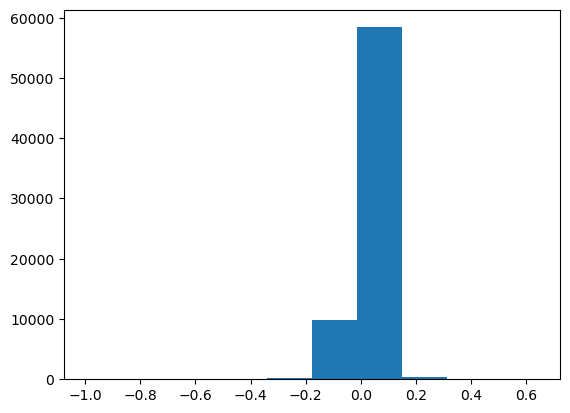

In [24]:
plt.figure()
plt.hist(value_all)
plt.show()

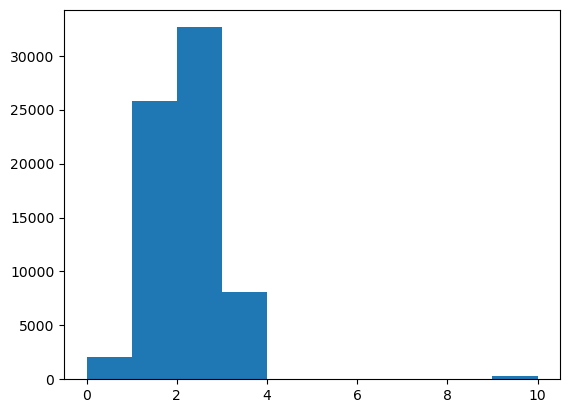

In [25]:
all_zeros = flatten_chain(np.array([*zeros_count_all.values()]))

plt.figure()
plt.hist(all_zeros)
plt.show()

On décide d'effectuer le troncage a 10^-4

#### Valeur entiere

In [26]:
from math import trunc

cond = plus_data.columns
zeros_count_all = {x: [] for x in cond}
value_all = {x: [] for x in cond}

for c in cond:
    list = plus_data[plus_data[c]][c].index
    PLM_1 = PLM_final[PLM_final.index.isin(list)]
    if PLM_1.empty :
        utility = 0 - (PLM_final.sum(axis=0) / PLM_final.shape[0])
    else :
        utility = (PLM_1.sum(axis=0) / PLM_1.shape[0]) - (PLM_final.sum(axis=0) / PLM_final.shape[0])
    
    for u in utility.index:
        utility[u] = trunc(round(utility[u], 4) * 10000) # Faire ça ici ou le faire dans utility trans tot (celui selectionner)
        
        value_all[c].append(utility[u])
        zeros_count_all[c].append(num_zeroes_after_point(utility[u]))

In [27]:
value_all = flatten_chain(np.array([*value_all.values()]))
value_all = np.array(value_all)
value_all_nozero = value_all[np.where(value_all != 0.0)]
pd.DataFrame(value_all_nozero).describe()

,0
count,68581.000000
mean,18.421020
std,399.140908
min,-9942.000000
25%,-55.000000
50%,-5.000000
75%,81.000000
max,6402.000000


In [28]:
pd.DataFrame(value_all).describe()

,0
count,68886.000000
mean,18.339459
std,398.258174
min,-9942.000000
25%,-55.000000
50%,-5.000000
75%,81.000000
max,6402.000000


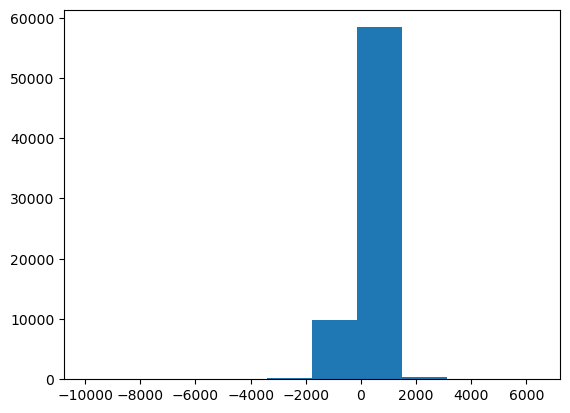

In [29]:
plt.figure()
plt.hist(value_all)
plt.show()

### Test sur valeur absolue entiere

On décide d'effectuer le troncage a 10^-4

In [30]:
from math import trunc

cond = plus_data.columns
zeros_count_all = {x: [] for x in cond}
value_all = {x: [] for x in cond}

for c in cond:
    list = plus_data[plus_data[c]][c].index
    PLM_1 = PLM_final[PLM_final.index.isin(list)]
    if PLM_1.empty :
        continue
    utility = np.abs((PLM_1.sum(axis=0) / PLM_1.shape[0]) - (PLM_final.sum(axis=0) / PLM_final.shape[0]))
    
    for u in utility.index:
        utility[u] = trunc(round(utility[u], 4) * 10000) # Faire ça ici ou le faire dans utility trans tot (celui selectionner)
        
        value_all[c].append(utility[u])
        zeros_count_all[c].append(num_zeroes_after_point(utility[u]))

zeros_count_all = {k:v for k,v in zeros_count_all.items() if v}
value_all = {k:v for k,v in value_all.items() if v}

In [31]:
value_all = flatten_chain(np.array([*value_all.values()]))
value_all = np.array(value_all)
value_all_nozero = value_all[np.where(value_all != 0.0)]
pd.DataFrame(value_all_nozero).describe()

,0
count,67691.000000
mean,175.650943
std,304.620894
min,1.000000
25%,23.000000
50%,66.000000
75%,195.000000
max,6402.000000


In [32]:
pd.DataFrame(value_all).describe()

,0
count,67996.000000
mean,174.863051
std,304.163486
min,0.000000
25%,23.000000
50%,65.000000
75%,194.000000
max,6402.000000


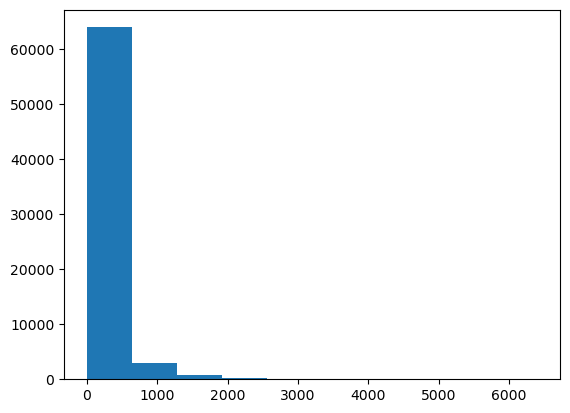

In [33]:
plt.figure()
plt.hist(value_all)
plt.show()

### Les Algo

https://data-mining.philippe-fournier-viger.com/key-papers-about-high-utility-itemset-mining/

- Brut =>
- Absolue => FHM float (from Philippe Fournier Vigier)
- Entier => FHN however for it negative U < positive U   => We want N U == P U but to distinguish :
    - **Separating data between col with N U and P U** => 
    - Decomposing the final utility of PLM by when it has N U and when it has P U
- Absolue & Entier => EFIM // **CHUI-Miner** (generators of maximal high utility itemsets = NO superset with frequent ones) // FHM+ (length restreint) // Bond measure (favorise PLM appearing only together)

In [34]:
from math import trunc

def input_algo_create(stress, data, abso = True, tronc = True):
    list = data[data[stress]][stress].index
    PLM_1 = PLM_final[PLM_final.index.isin(list)]
    
    trad_list = pd.DataFrame([[str(i), PLM_1.columns[i]] for i in range(len(PLM_1.columns))])
    if abso :
        if PLM_1.empty :
            return print("no PLM")
        utility = np.abs(PLM_1.sum(axis=0) / PLM_1.shape[0] - PLM_final.sum(axis=0) / PLM_final.shape[0])
    else :
        if PLM_1.empty : # When no gene express in condition, no PLM express so 0
            utility = 0 - PLM_final.sum(axis=0) / PLM_final.shape[0]
        else :
            utility = PLM_1.sum(axis=0) / PLM_1.shape[0] - PLM_final.sum(axis=0) / PLM_final.shape[0]
        for e in range(len(trad_list[1])):
            if utility.iloc[e] < 0:
                trad_list.iloc[e,0] = "-" + trad_list.iloc[e,0]
        utility = np.abs(utility)
    
    if tronc == True:
        for u in utility.index:
            utility[u] = trunc(round(utility[u], 4) * 10000) # Faire ça ici ou le faire dans utility trans tot (celui selectionner)
        utility = utility.astype(int)
    else :
        for u in utility.index:
            utility[u] = round(utility[u], 4)
    
    res = {"trans" : [], "utility_trans_tot" : [], "utility_trans" : []}
    for T in range(len(PLM_1.index)):
        PLM_line = PLM_1.iloc[T,:]
        col_trans = trad_list[PLM_line.values]
        col_trans = col_trans.set_index(1)
    
        res["trans"].append(" ".join(str(e) for e in col_trans[0].values))
        res["utility_trans"].append(" ".join(str(e) for e in utility[PLM_line].values))
        res["utility_trans_tot"].append(sum(utility[PLM_line].values))

    return trad_list, res

""" else :
    res_pos = {"trans" : [], "utility_trans_tot" : [], "utility_trans" : []}
    res_neg = {"trans" : [], "utility_trans_tot" : [], "utility_trans" : []}
    
    for T in range(len(PLM_1.index)):
        PLM_line_pos = PLM_1.iloc[T,:][utility[utility > 0.0].index]
        PLM_line_neg = PLM_1.iloc[T,:][utility[utility < 0.0].index]
        
        col_trans_pos = trad_list[trad_list[1].isin(PLM_line_pos.index)][PLM_line_pos.values]
        col_trans_pos = col_trans_pos.set_index(1)
        
        col_trans_neg = trad_list[trad_list[1].isin(PLM_line_neg.index)][PLM_line_neg.values]
        col_trans_neg = col_trans_neg.set_index(1)
        
        res_pos["trans"].append(" ".join(str(e) for e in col_trans_pos[0].values))
        res_pos["utility_trans"].append(" ".join(str(e) for e in utility[PLM_line_pos.index][PLM_line_pos.values].values))
        res_pos["utility_trans_tot"].append(utility[PLM_line_pos.index][PLM_line_pos.values].values.sum())
        
        res_neg["trans"].append(" ".join(str(e) for e in col_trans_neg[0].values))
        res_neg["utility_trans"].append(" ".join(str(e) for e in abs(utility[PLM_line_neg.index][PLM_line_neg.values].values)))
        res_neg["utility_trans_tot"].append(abs(utility[PLM_line_neg.index][PLM_line_neg.values].values.sum()))
    
    return trad_list, res_pos, res_neg """

' else :\n    res_pos = {"trans" : [], "utility_trans_tot" : [], "utility_trans" : []}\n    res_neg = {"trans" : [], "utility_trans_tot" : [], "utility_trans" : []}\n    \n    for T in range(len(PLM_1.index)):\n        PLM_line_pos = PLM_1.iloc[T,:][utility[utility > 0.0].index]\n        PLM_line_neg = PLM_1.iloc[T,:][utility[utility < 0.0].index]\n        \n        col_trans_pos = trad_list[trad_list[1].isin(PLM_line_pos.index)][PLM_line_pos.values]\n        col_trans_pos = col_trans_pos.set_index(1)\n        \n        col_trans_neg = trad_list[trad_list[1].isin(PLM_line_neg.index)][PLM_line_neg.values]\n        col_trans_neg = col_trans_neg.set_index(1)\n        \n        res_pos["trans"].append(" ".join(str(e) for e in col_trans_pos[0].values))\n        res_pos["utility_trans"].append(" ".join(str(e) for e in utility[PLM_line_pos.index][PLM_line_pos.values].values))\n        res_pos["utility_trans_tot"].append(utility[PLM_line_pos.index][PLM_line_pos.values].values.sum())\n        \

### (Brut)

In [13]:
trad, res = input_algo_create("DROUGHT__Total_RNA_Drought_1 / Total_RNA_Control_1", plus_data, abso = False, tronc = False)
res = pd.DataFrame(res)

NameError: name 'input_algo_create' is not defined

In [ ]:
res.head()

,trans,utility_trans_tot,utility_trans
0,-11 17 40 -41 42 47 48 53 55 56 57 59 60 62 68...,1.5662,0.0487 0.0476 0.0618 0.1046 0.0406 0.0752 0.02...
1,9 -41 68 74 -88 -119 -147 148 -152 162 -166 176,0.5931,0.0107 0.1046 0.1614 0.1112 0.0004 0.0258 0.02...
2,9 -11 17 20 68 114 117 118 -122 -123 -135 -147...,0.5645,0.0107 0.0487 0.0476 0.0218 0.1614 0.095 0.021...
3,-4 -7 9 -11 20 33 -116 120 -124 130 137 140 -1...,0.4836,0.0225 0.0345 0.0107 0.0487 0.0218 0.0068 0.06...
4,9 17 -21 40 42 47 48 53 55 56 59 60 68 74 86 -...,1.3170,0.0107 0.0476 0.0416 0.0618 0.0406 0.0752 0.02...


In [ ]:
res["utility_trans_tot"].describe()

count    89.000000
mean      0.741342
std       0.392623
min       0.182300
25%       0.480000
50%       0.610000
75%       0.893300
max       2.199500
Name: utility_trans_tot, dtype: float64

### (Absolue)

In [ ]:
trad, res_abs = input_algo_create("DROUGHT__Total_RNA_Drought_1 / Total_RNA_Control_1", plus_data, abso = True, tronc = False)
res_abs = pd.DataFrame(res_abs)
res_abs

,trans,utility_trans_tot,utility_trans
0,11 17 40 41 42 47 48 53 55 56 57 59 60 62 68 7...,1.5662,0.0487 0.0476 0.0618 0.1046 0.0406 0.0752 0.02...
1,9 41 68 74 88 119 147 148 152 162 166 176,0.5931,0.0107 0.1046 0.1614 0.1112 0.0004 0.0258 0.02...
2,9 11 17 20 68 114 117 118 122 123 135 147 166 176,0.5645,0.0107 0.0487 0.0476 0.0218 0.1614 0.095 0.021...
3,4 7 9 11 20 33 116 120 124 130 137 140 147 152...,0.4836,0.0225 0.0345 0.0107 0.0487 0.0218 0.0068 0.06...
4,9 17 21 40 42 47 48 53 55 56 59 60 68 74 86 99...,1.3170,0.0107 0.0476 0.0416 0.0618 0.0406 0.0752 0.02...
...,...,...,...
84,11 17 18 20 21 68 74 119 166 167,0.5031,0.0487 0.0476 0.0064 0.0218 0.0416 0.1614 0.11...
85,9 11 17 21 68 113 116 126 148 158 166,0.4816,0.0107 0.0487 0.0476 0.0416 0.1614 0.0319 0.06...
86,9 11 17 23 37 43 47 53 54 55 56 57 58 59 60 62...,1.6368,0.0107 0.0487 0.0476 0.0075 0.0637 0.0358 0.07...
87,11 41 52 63 119 120 135 137 138 139 140 141 14...,0.8966,0.0487 0.1046 0.0668 0.1072 0.0258 0.0048 0.01...


In [ ]:
res_abs["utility_trans_tot"].describe()

count    89.000000
mean      0.741342
std       0.392623
min       0.182300
25%       0.480000
50%       0.610000
75%       0.893300
max       2.199500
Name: utility_trans_tot, dtype: float64

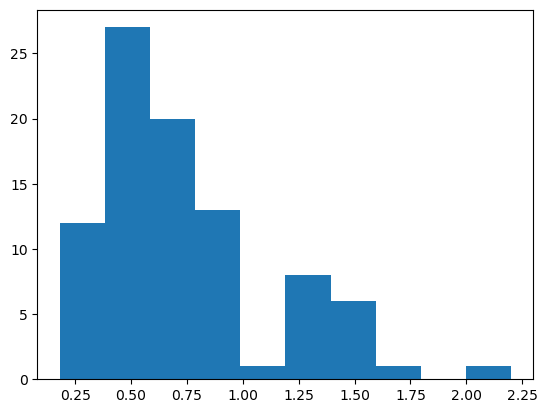

In [ ]:
plt.figure()
plt.hist(res_abs["utility_trans_tot"])
plt.show()

### (Entier)

In [ ]:
trad, res_int = input_algo_create("DROUGHT__Total_RNA_Drought_1 / Total_RNA_Control_1", plus_data, abso = False, tronc = True)
res_int = pd.DataFrame(res_int)

In [ ]:
res_int.sort_values("utility_trans_tot", ascending=True)

,trans,utility_trans_tot,utility_trans
73,9 20 -119 -126 140 -147 165 -166 -167,1823,107 218 258 286 248 271 49 55 331
64,9 17 86 -119 -147 148 -166 176,2289,107 476 114 258 271 222 55 786
8,17 -26 127 139 140 148 -152 -167,2546,476 245 620 350 248 222 54 331
30,-6 9 -11 17 -21 112 -126 -166 -167 -177,2858,138 107 487 476 416 197 286 55 331 365
19,9 -21 114 -119 -136 148 -158 -166 176,3051,107 416 950 258 23 222 234 55 786
...,...,...,...
31,9 17 37 38 40 42 47 53 55 56 57 59 60 66 68 74...,15514,107 476 637 173 618 406 752 988 835 1149 712 7...
0,-11 17 40 -41 42 47 48 53 55 56 57 59 60 62 68...,15661,487 476 618 1046 406 752 287 988 835 1149 712 ...
69,9 17 37 40 43 46 49 -50 53 55 56 60 68 73 74 7...,15692,107 476 637 618 358 254 474 488 988 835 1149 7...
86,9 -11 17 23 37 43 47 53 54 55 56 57 58 59 60 6...,16365,107 487 476 75 637 358 752 988 59 835 1149 712...


In [ ]:
res_int["utility_trans_tot"].describe()

count       89.000000
mean      7412.269663
std       3925.869391
min       1823.000000
25%       4800.000000
50%       6099.000000
75%       8930.000000
max      21991.000000
Name: utility_trans_tot, dtype: float64

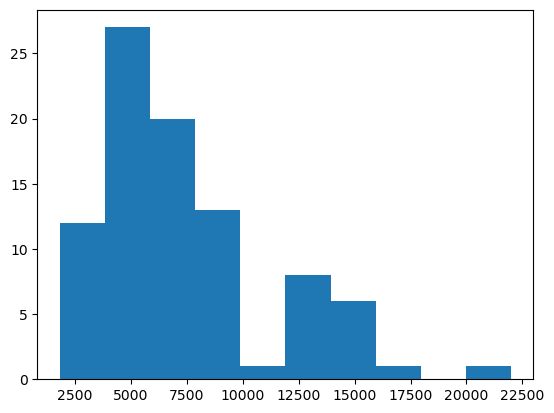

In [ ]:
plt.figure()
plt.hist(res_int["utility_trans_tot"])
plt.show()

### (Absolue & Entier)

In [ ]:
trad, res_absint = input_algo_create("DROUGHT__Total_RNA_Drought_1 / Total_RNA_Control_1", plus_data, abso = True, tronc = True)
res_absint = pd.DataFrame(res_absint)
res_absint

,trans,utility_trans_tot,utility_trans
0,11 17 40 41 42 47 48 53 55 56 57 59 60 62 68 7...,15661,487 476 618 1046 406 752 287 988 835 1149 712 ...
1,9 41 68 74 88 119 147 148 152 162 166 176,5930,107 1046 1613 1112 4 258 271 222 54 402 55 786
2,9 11 17 20 68 114 117 118 122 123 135 147 166 176,5643,107 487 476 218 1613 950 214 162 63 73 168 271...
3,4 7 9 11 20 33 116 120 124 130 137 140 147 152...,4834,225 345 107 487 218 68 600 47 457 95 319 248 2...
4,9 17 21 40 42 47 48 53 55 56 59 60 68 74 86 99...,13169,107 476 416 618 406 752 287 988 835 1149 751 7...
...,...,...,...
84,11 17 18 20 21 68 74 119 166 167,5030,487 476 64 218 416 1613 1112 258 55 331
85,9 11 17 21 68 113 116 126 148 158 166,4815,107 487 476 416 1613 319 600 286 222 234 55
86,9 11 17 23 37 43 47 53 54 55 56 57 58 59 60 62...,16365,107 487 476 75 637 358 752 988 59 835 1149 712...
87,11 41 52 63 119 120 135 137 138 139 140 141 14...,8965,487 1046 668 1072 258 47 168 319 59 350 248 69...


In [ ]:
res_absint["utility_trans_tot"].describe()

count       89.000000
mean      7412.269663
std       3925.869391
min       1823.000000
25%       4800.000000
50%       6099.000000
75%       8930.000000
max      21991.000000
Name: utility_trans_tot, dtype: float64

Script to create an input text files for each condition and only using abso = False and Tronc = True

In [ ]:
cond = plus_data.columns
trad_list_cond = pd.DataFrame([[i, plus_data.columns[i]] for i in range(len(plus_data.columns))])
trad_list_cond = trad_list_cond.set_index(1)

tot_res_plus = []

for c in cond:
    trad, res = input_algo_create(c, plus_data, abso = False, tronc = True)
    res = pd.DataFrame(res)
    tot_res_plus.append(res["utility_trans_tot"])
    name =  "input/" + "inputplus_absint" + '_' + str(trad_list_cond.loc[c].values[0]) + ".txt"
    res.to_csv(name, sep=':', index=False, header = False)
    trad.to_csv("input/" + "trad_PLM_plus" + '_' + str(trad_list_cond.loc[c].values[0]) + ".csv")
    print(name)
    print("input/" + "trad_PLM_plus" + '_' + str(trad_list_cond.loc[c].values[0]) + ".csv")

input/inputplus_absint_0.txt
trad_PLM_plus_0.csv
input/inputplus_absint_1.txt
trad_PLM_plus_1.csv
input/inputplus_absint_2.txt
trad_PLM_plus_2.csv
input/inputplus_absint_3.txt
trad_PLM_plus_3.csv
input/inputplus_absint_4.txt
trad_PLM_plus_4.csv
input/inputplus_absint_5.txt
trad_PLM_plus_5.csv
input/inputplus_absint_6.txt
trad_PLM_plus_6.csv
input/inputplus_absint_7.txt
trad_PLM_plus_7.csv
input/inputplus_absint_8.txt
trad_PLM_plus_8.csv
input/inputplus_absint_9.txt
trad_PLM_plus_9.csv
input/inputplus_absint_10.txt
trad_PLM_plus_10.csv
input/inputplus_absint_11.txt
trad_PLM_plus_11.csv
input/inputplus_absint_12.txt
trad_PLM_plus_12.csv
input/inputplus_absint_13.txt
trad_PLM_plus_13.csv
input/inputplus_absint_14.txt
trad_PLM_plus_14.csv
input/inputplus_absint_15.txt
trad_PLM_plus_15.csv
input/inputplus_absint_16.txt
trad_PLM_plus_16.csv
input/inputplus_absint_17.txt
trad_PLM_plus_17.csv
input/inputplus_absint_18.txt
trad_PLM_plus_18.csv
input/inputplus_absint_19.txt
trad_PLM_plus_19.csv


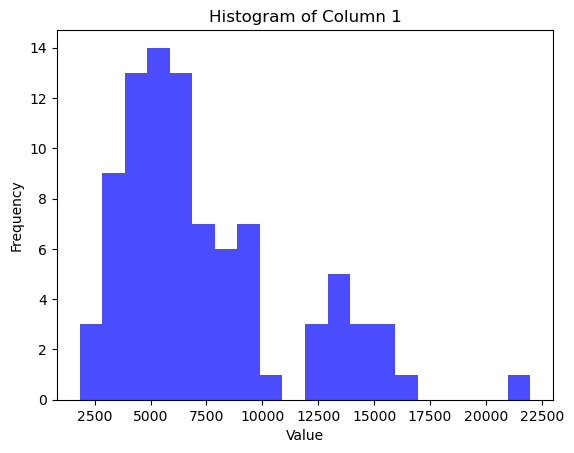

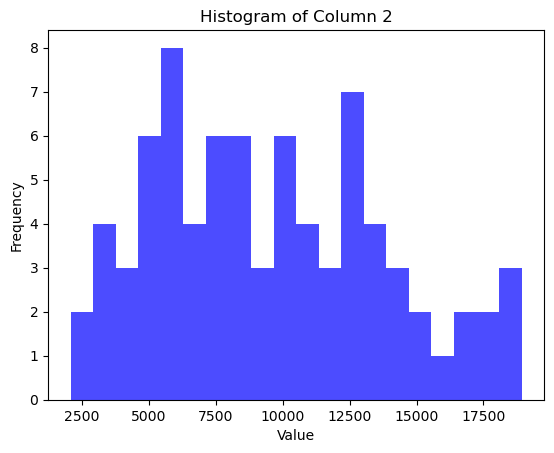

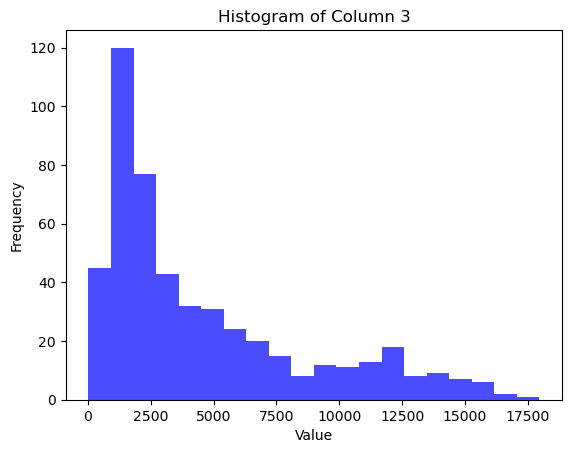

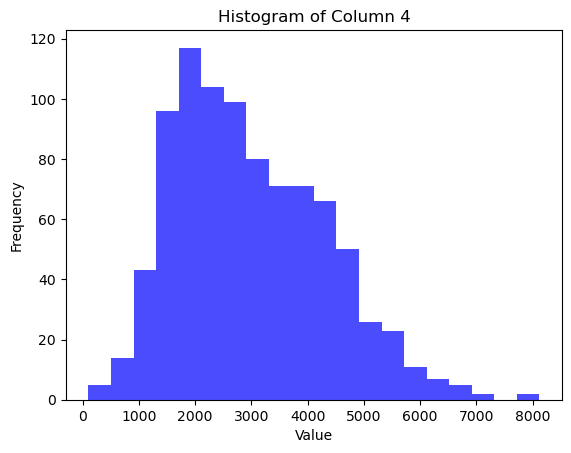

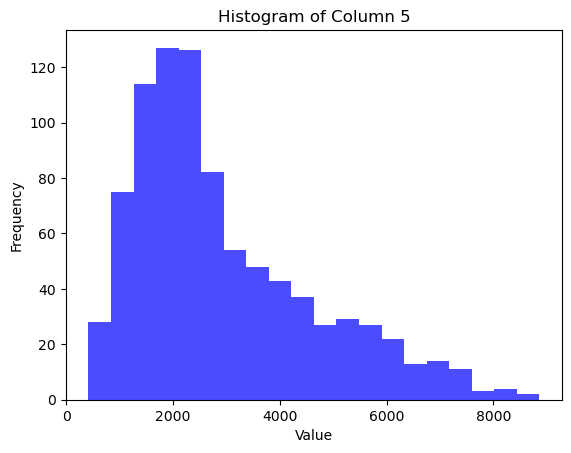

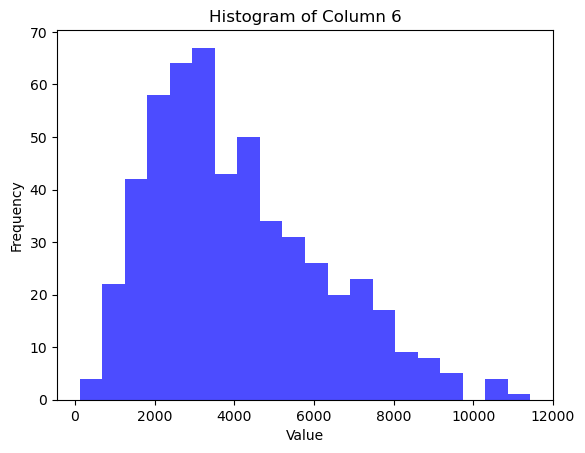

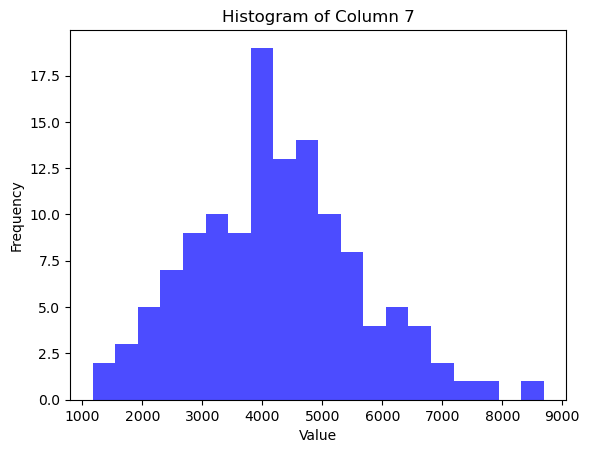

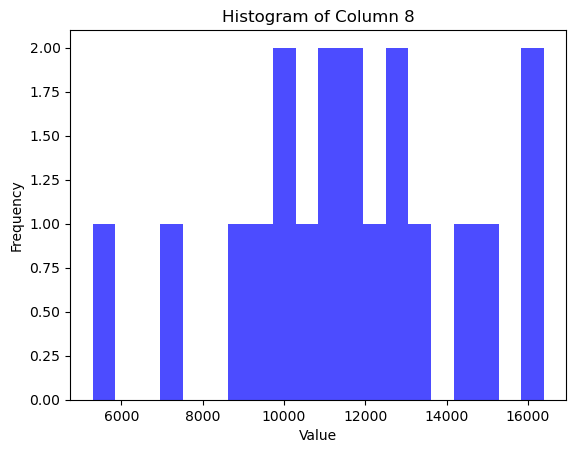

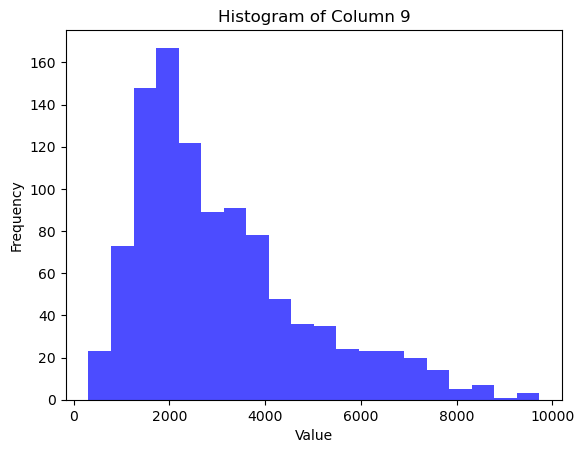

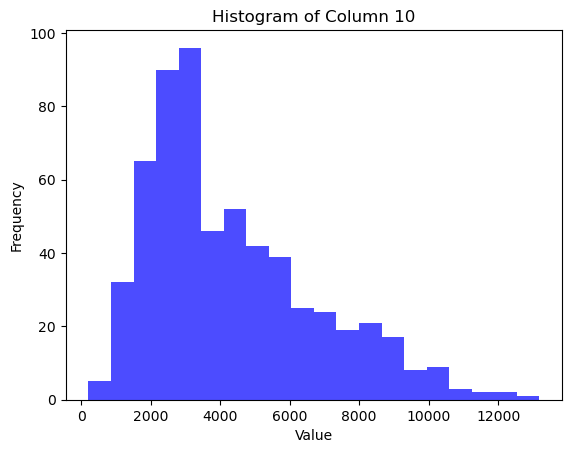

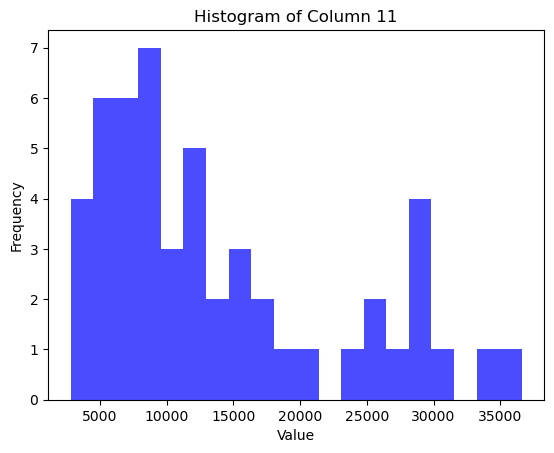

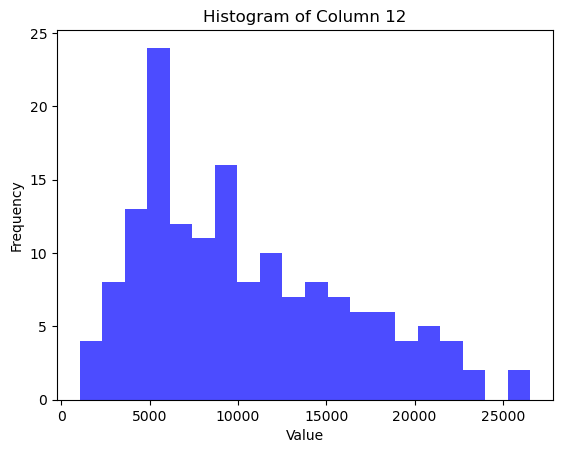

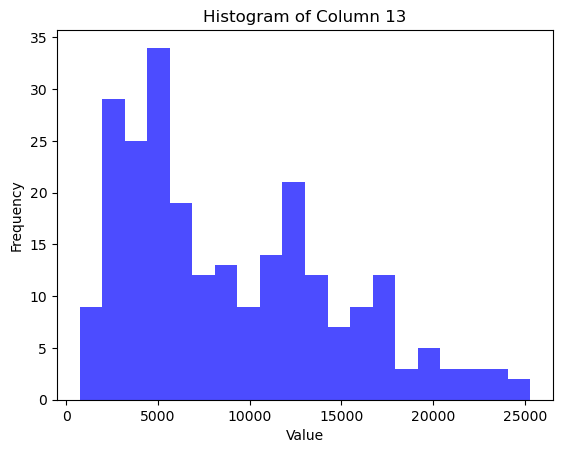

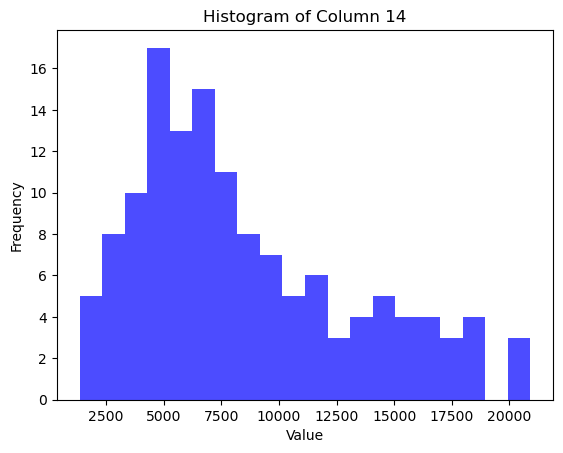

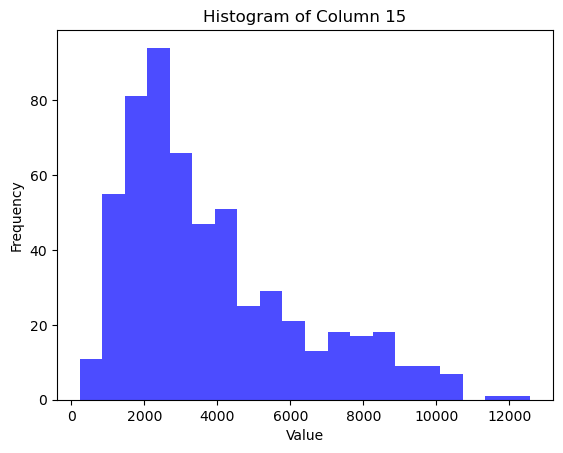

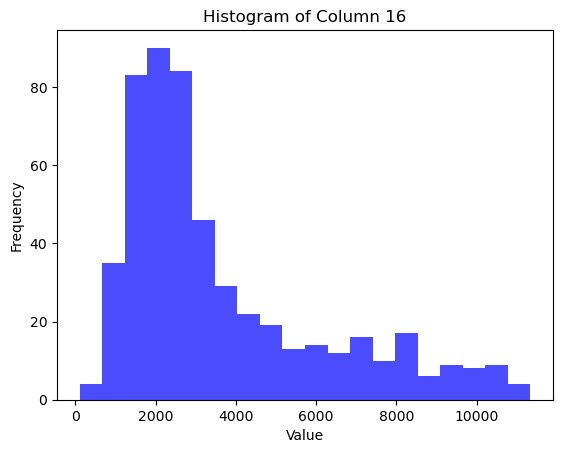

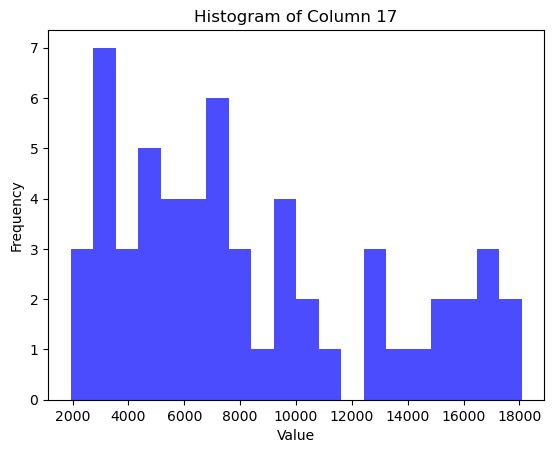

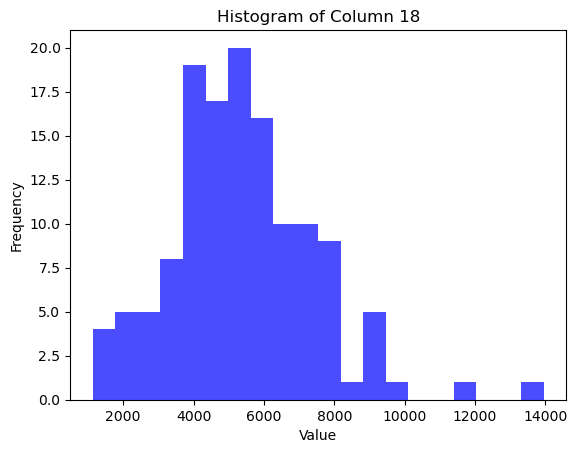

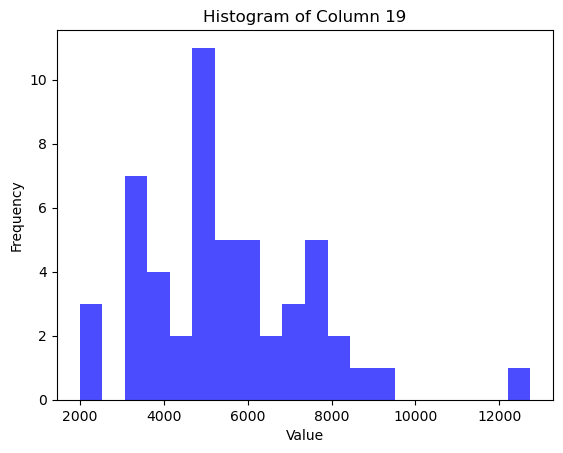

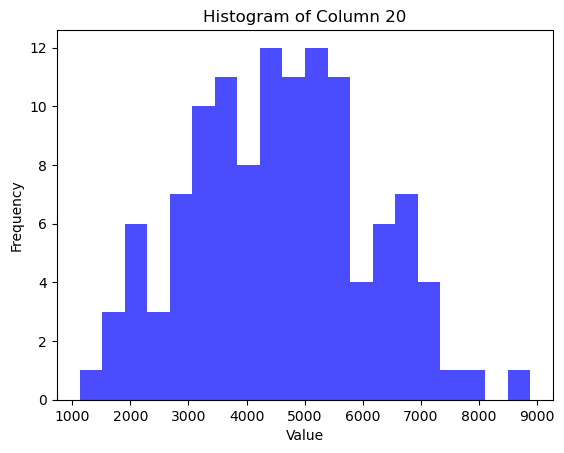

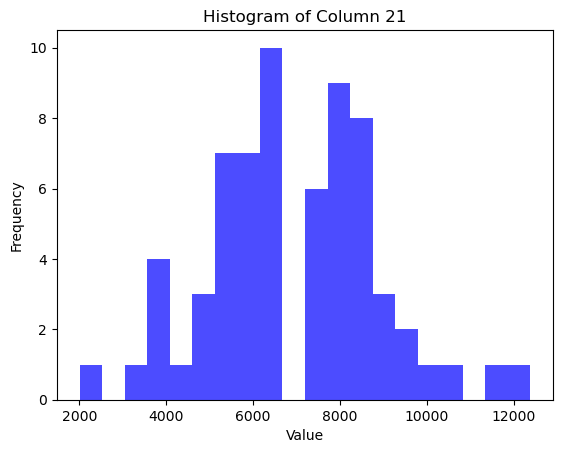

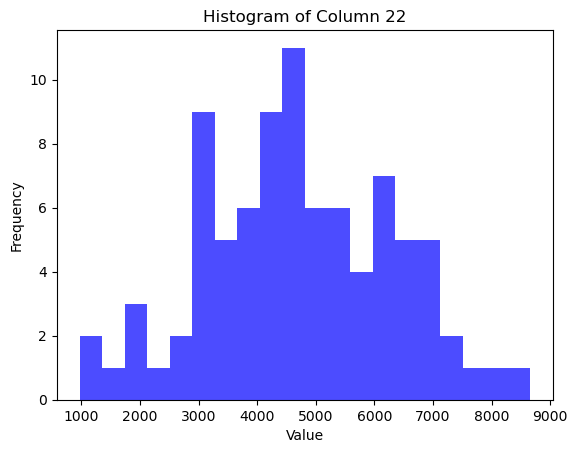

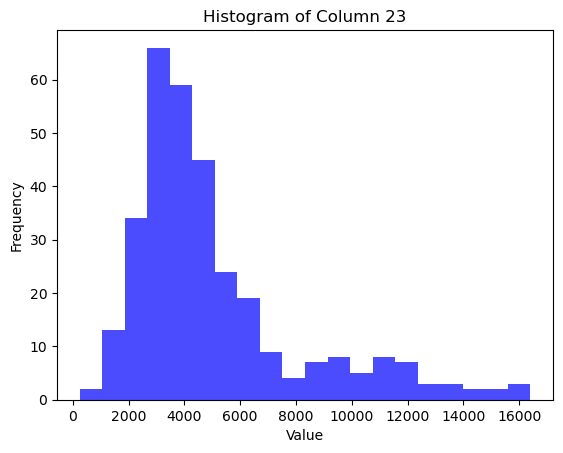

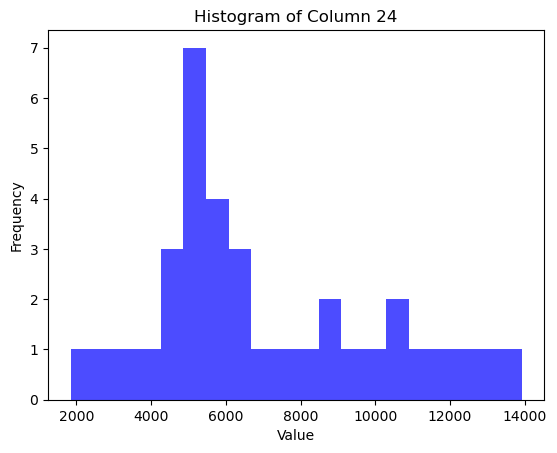

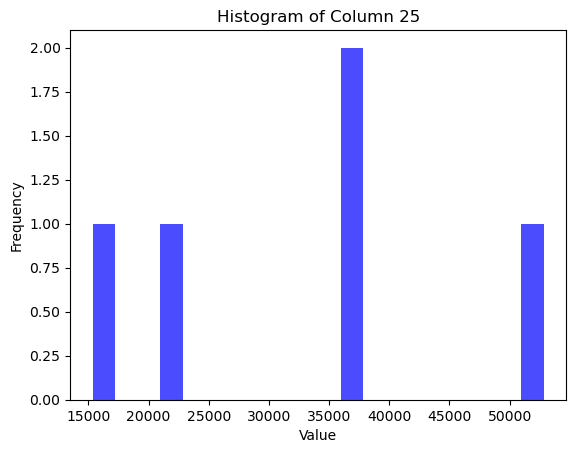

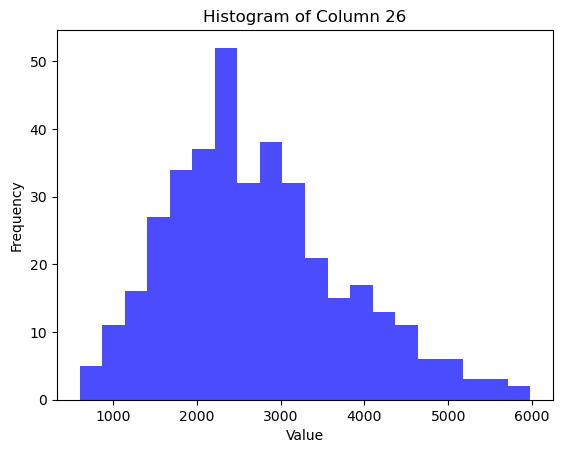

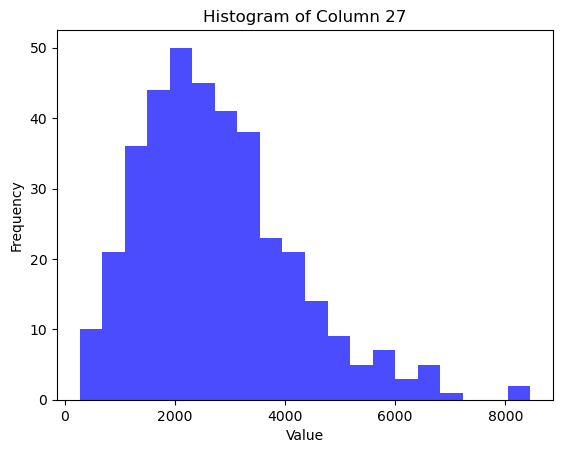

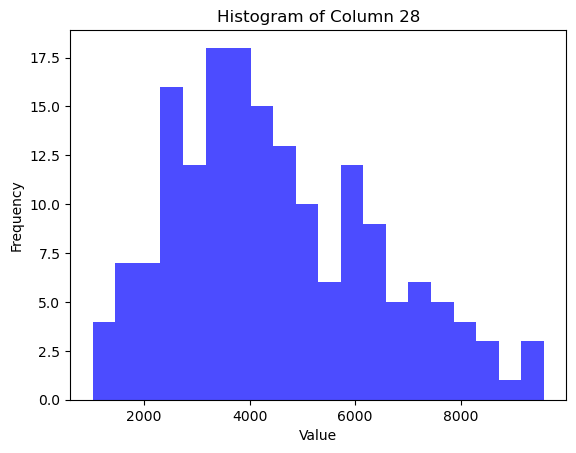

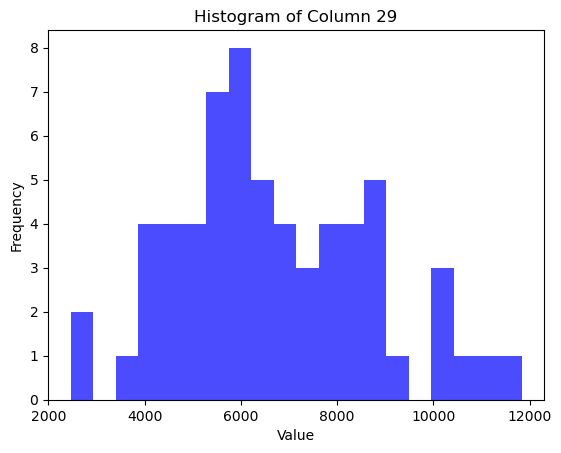

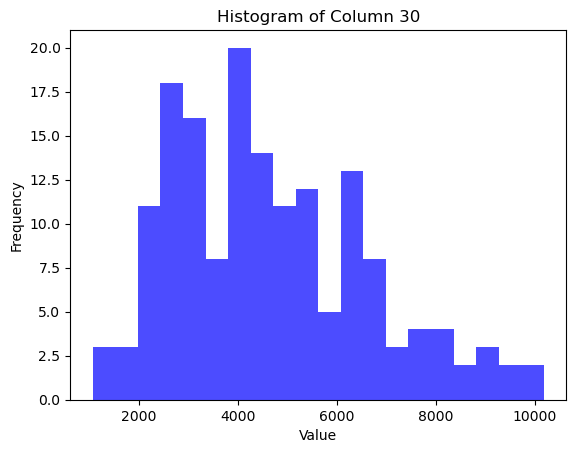

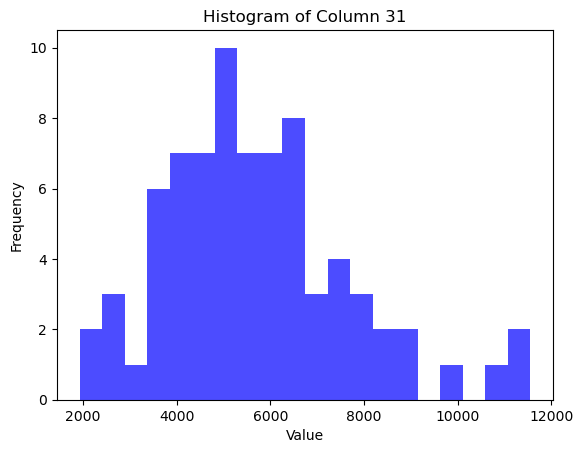

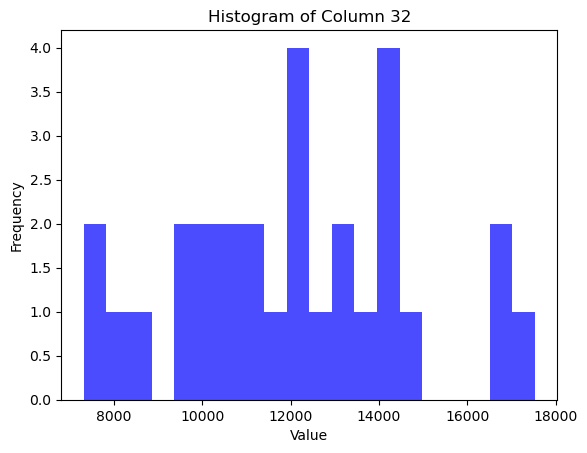

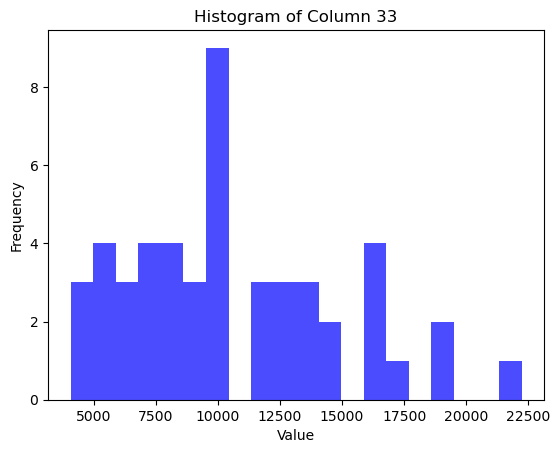

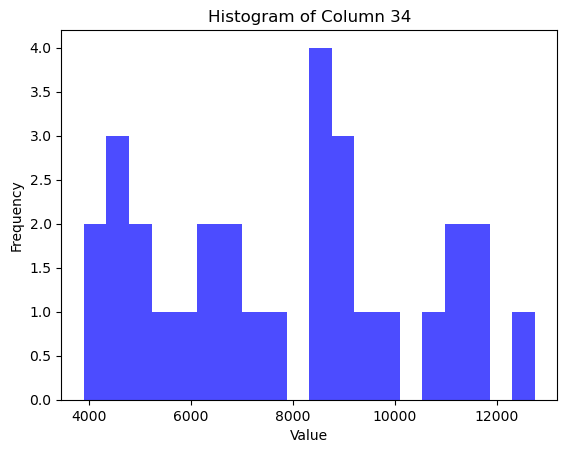

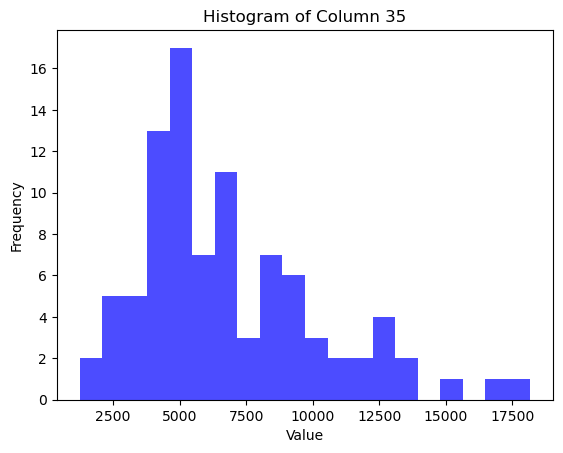

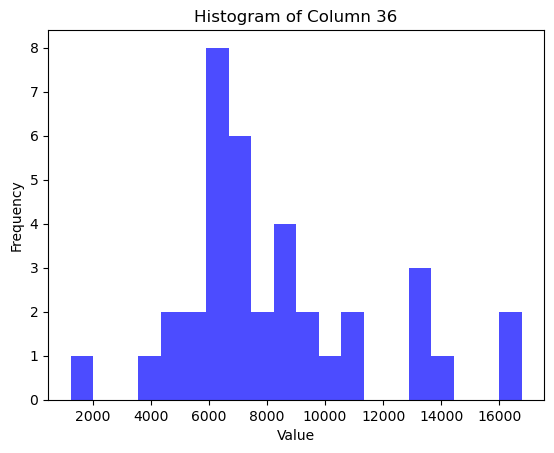

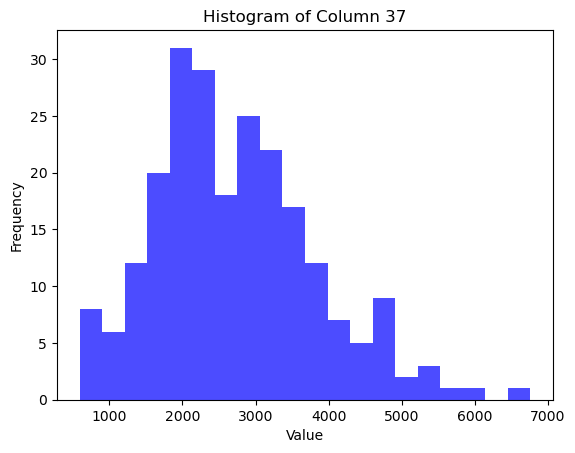

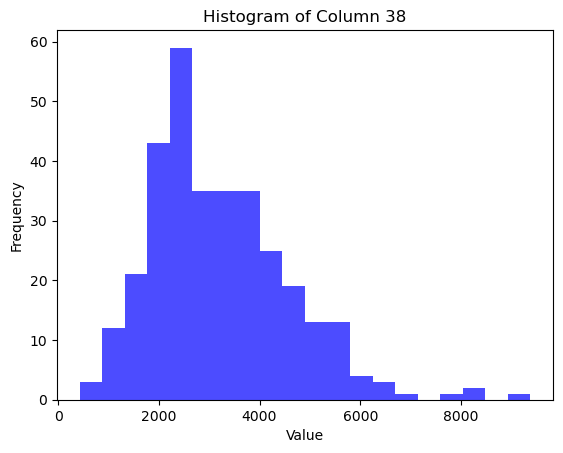

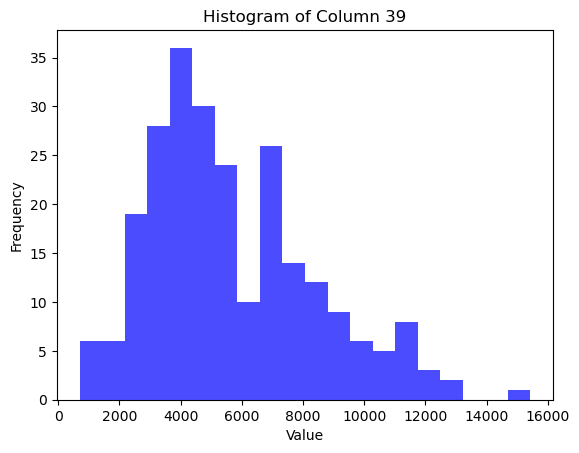

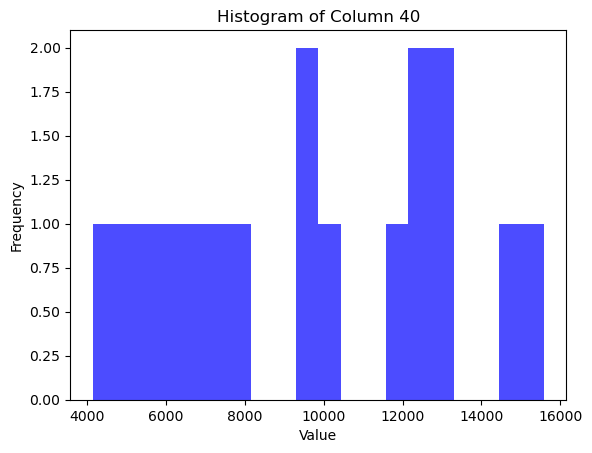

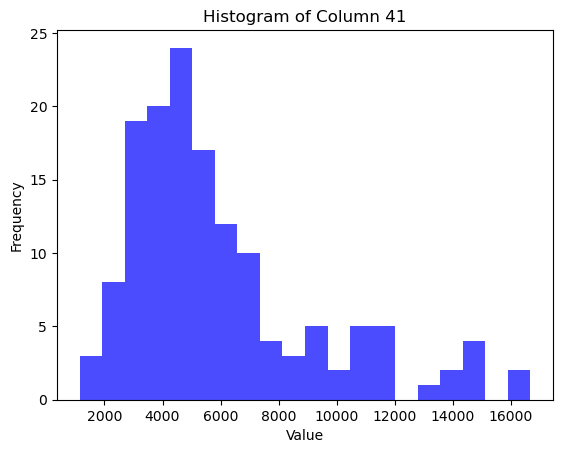

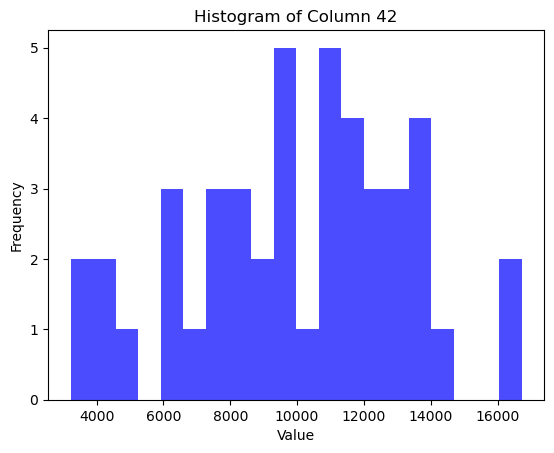

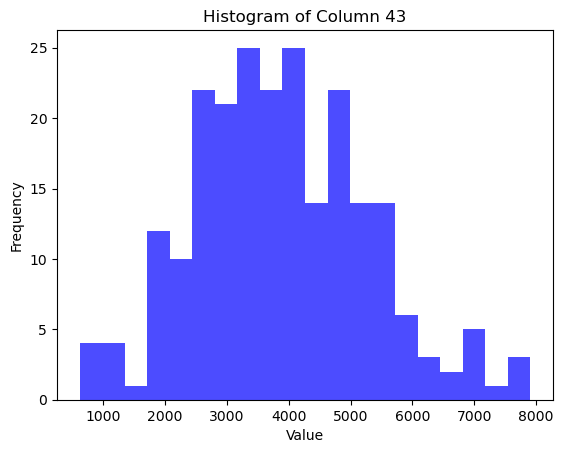

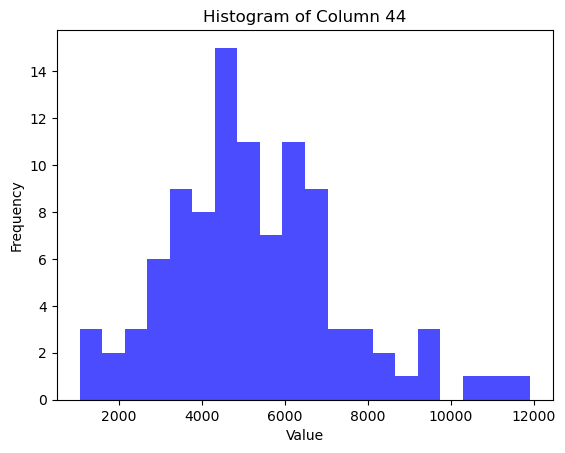

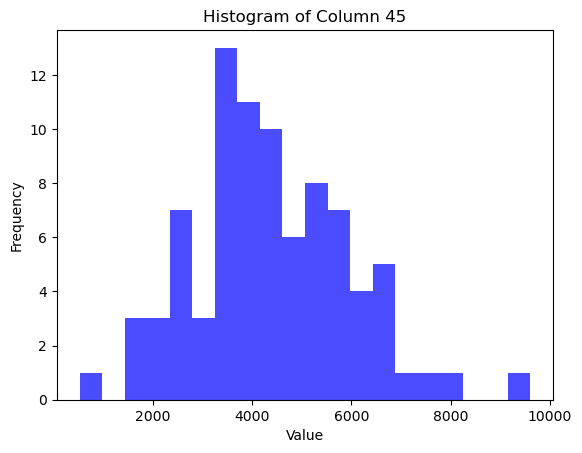

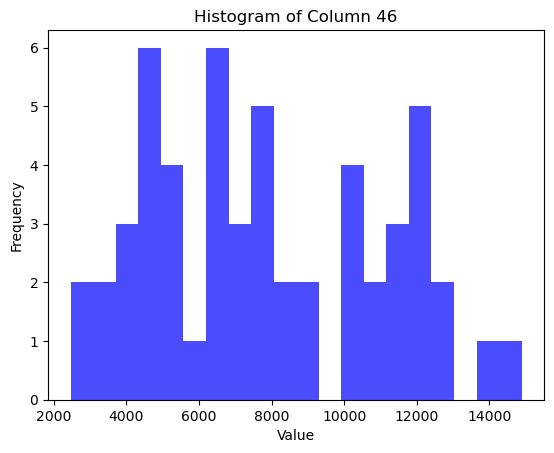

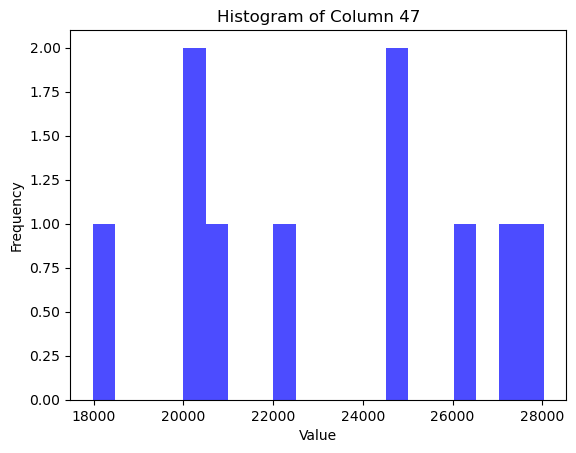

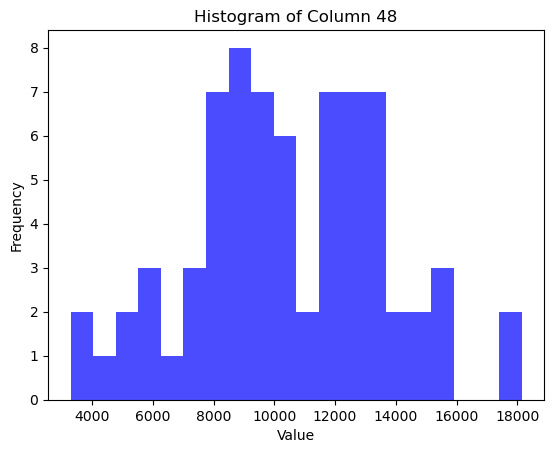

KeyboardInterrupt: 

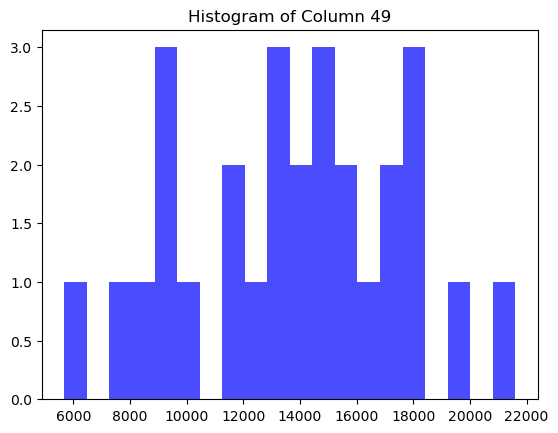

In [ ]:
for i in range(20): #len(tot_res_plus)
    plt.figure()
    plt.hist(tot_res_plus[i], bins=20, alpha=0.7, color='blue')
    plt.title(f'Histogram of Column {i+1}')
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.show()

In [ ]:
cond = minus_data.columns
trad_list_cond = pd.DataFrame([[i, minus_data.columns[i]] for i in range(len(minus_data.columns))])
trad_list_cond = trad_list_cond.set_index(1)

tot_res_minus = []

for c in cond:
    trad, res = input_algo_create(c, minus_data, abso = False, tronc = True)
    res = pd.DataFrame(res)
    tot_res_minus.append(res["utility_trans_tot"])
    name =  "input/" + "inputminus_absint" + '_' + str(trad_list_cond.loc[c].values[0]) + ".txt"
    res.to_csv(name, sep=':', index=False, header = False)
    trad.to_csv("input/" + "trad_PLM_minus" + '_' + str(trad_list_cond.loc[c].values[0]) + ".csv")
    print(name)
    print("trad_PLM_minus" + '_' + str(trad_list_cond.loc[c].values[0]) + ".csv")

input/inputminus_absint_0.txt
trad_PLM_minus_0.csv
input/inputminus_absint_1.txt
trad_PLM_minus_1.csv
input/inputminus_absint_2.txt
trad_PLM_minus_2.csv
input/inputminus_absint_3.txt
trad_PLM_minus_3.csv
input/inputminus_absint_4.txt
trad_PLM_minus_4.csv
input/inputminus_absint_5.txt
trad_PLM_minus_5.csv
input/inputminus_absint_6.txt
trad_PLM_minus_6.csv
input/inputminus_absint_7.txt
trad_PLM_minus_7.csv
input/inputminus_absint_8.txt
trad_PLM_minus_8.csv
input/inputminus_absint_9.txt
trad_PLM_minus_9.csv
input/inputminus_absint_10.txt
trad_PLM_minus_10.csv
input/inputminus_absint_11.txt
trad_PLM_minus_11.csv
input/inputminus_absint_12.txt
trad_PLM_minus_12.csv
input/inputminus_absint_13.txt
trad_PLM_minus_13.csv
input/inputminus_absint_14.txt
trad_PLM_minus_14.csv
input/inputminus_absint_15.txt
trad_PLM_minus_15.csv
input/inputminus_absint_16.txt
trad_PLM_minus_16.csv
input/inputminus_absint_17.txt
trad_PLM_minus_17.csv
input/inputminus_absint_18.txt
trad_PLM_minus_18.csv
input/inputmi

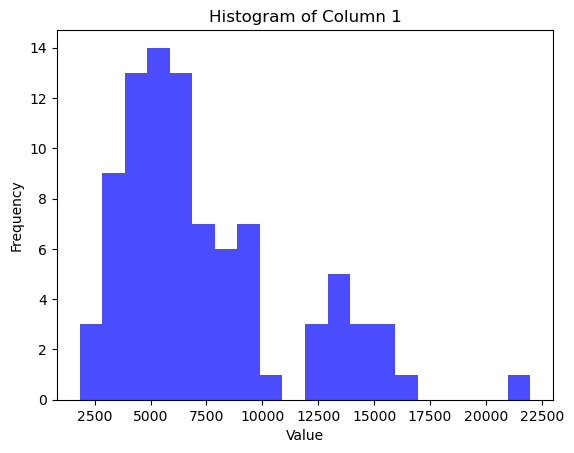

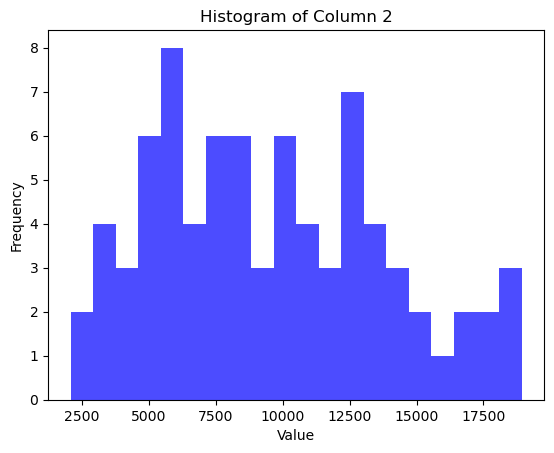

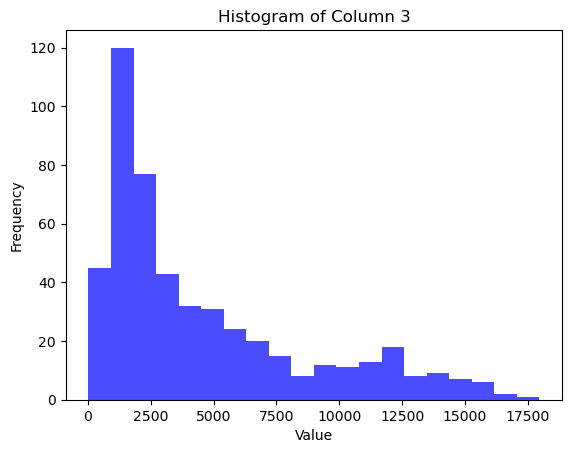

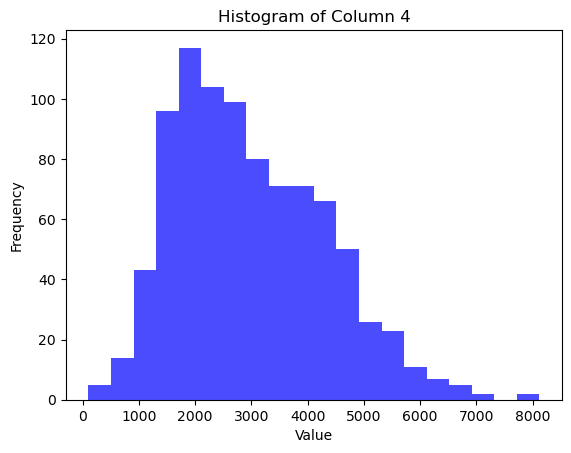

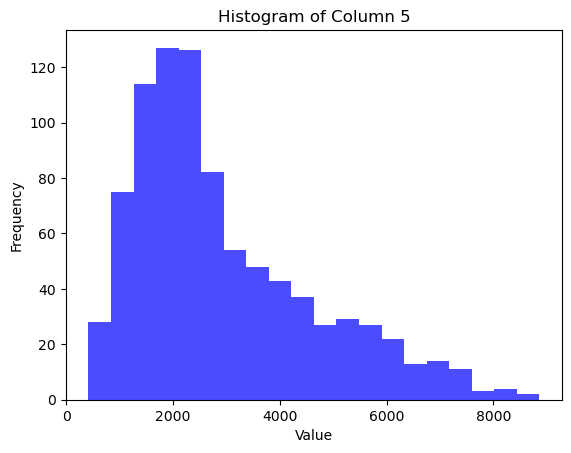

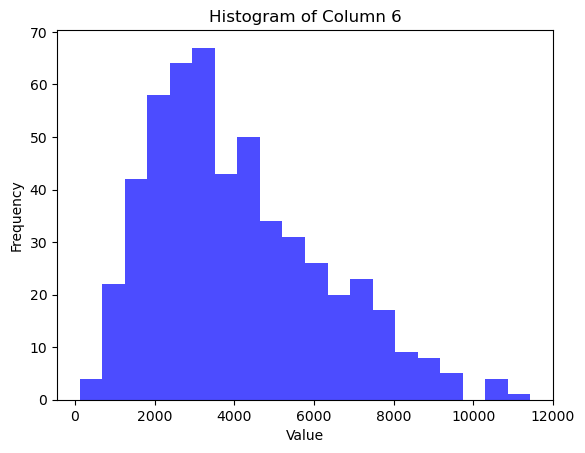

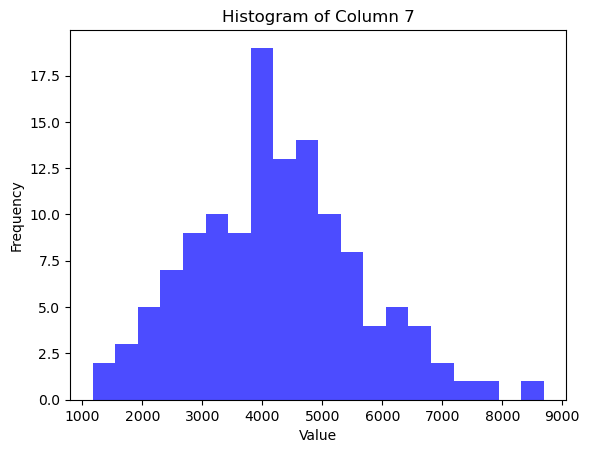

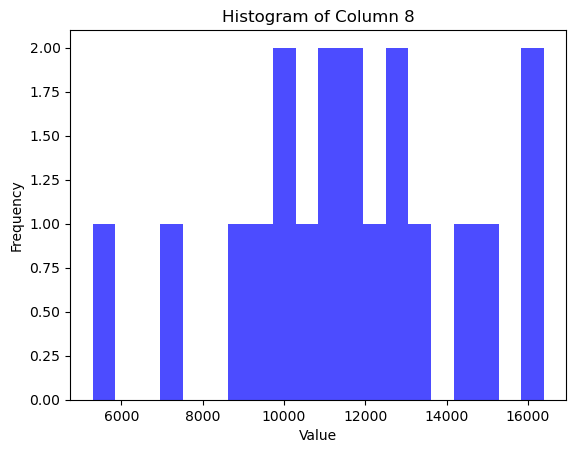

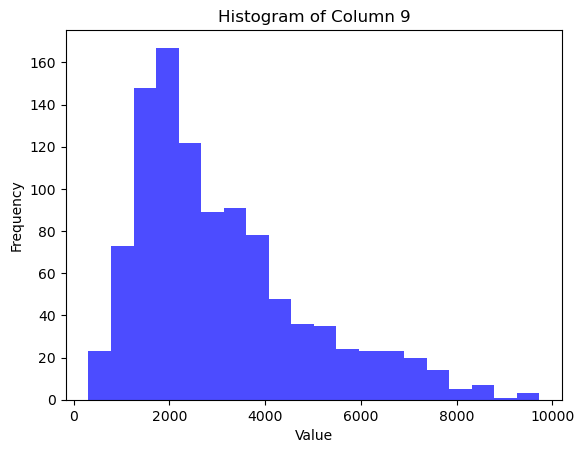

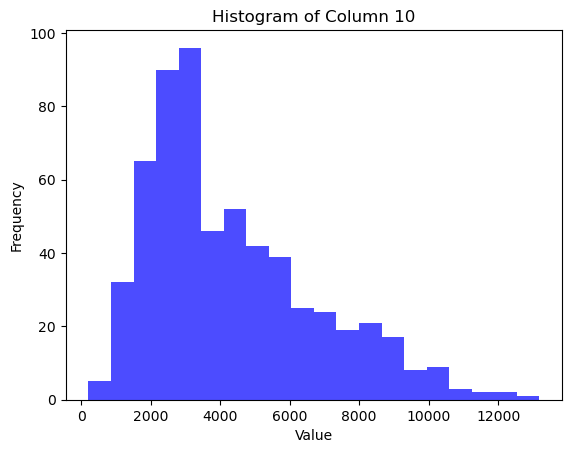

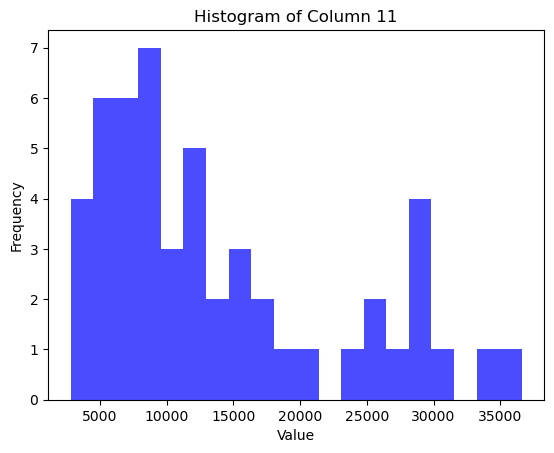

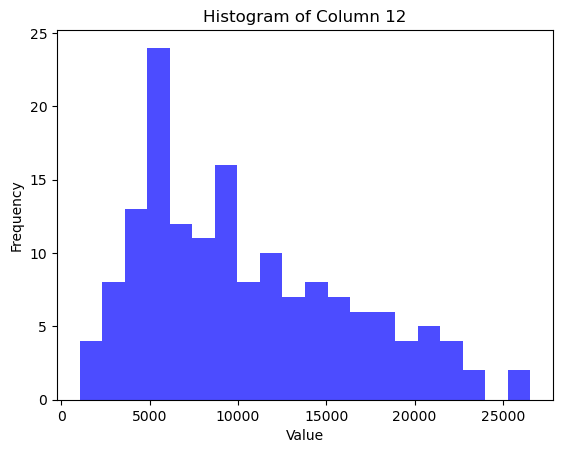

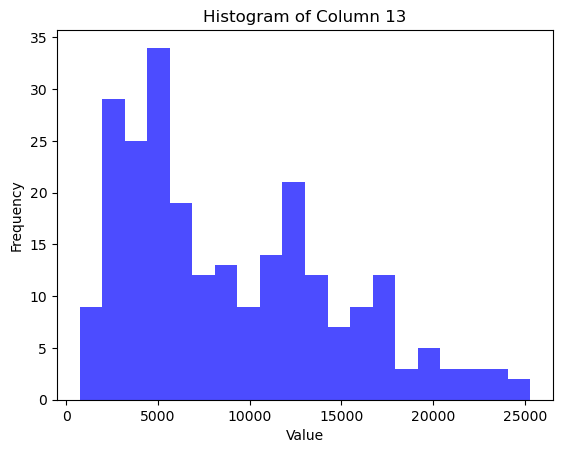

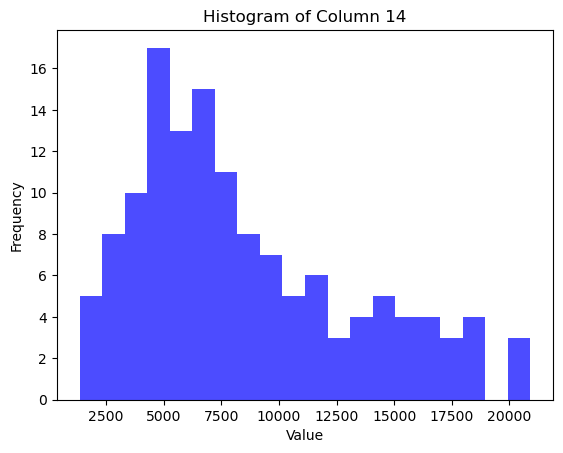

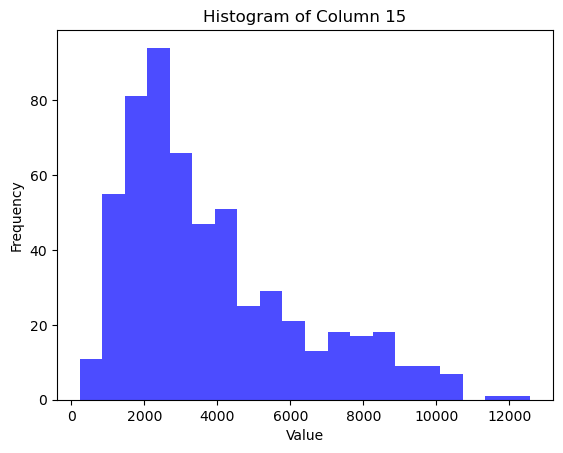

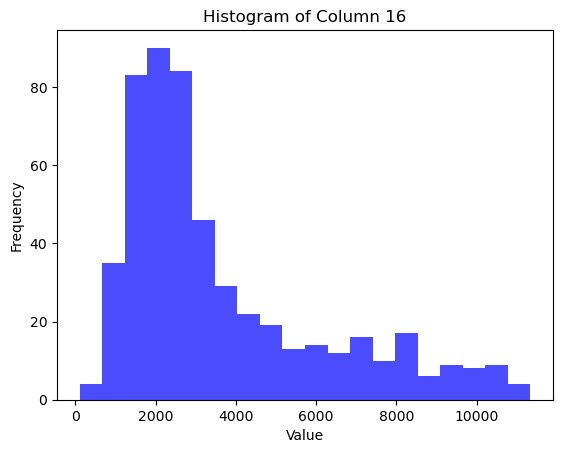

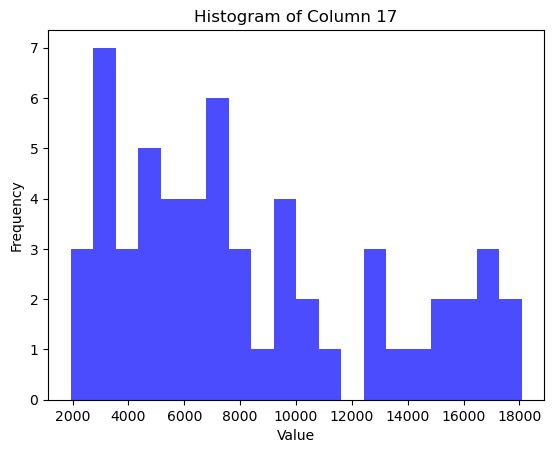

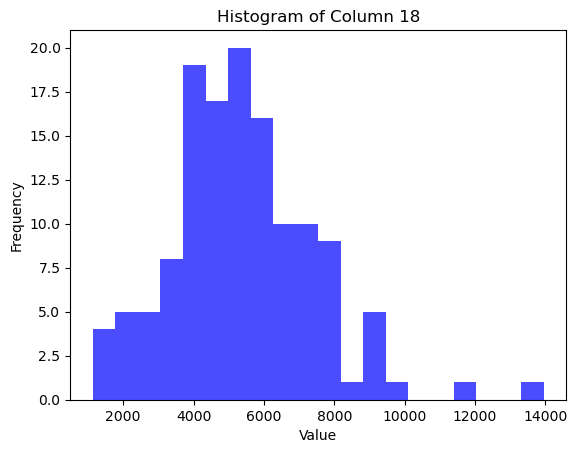

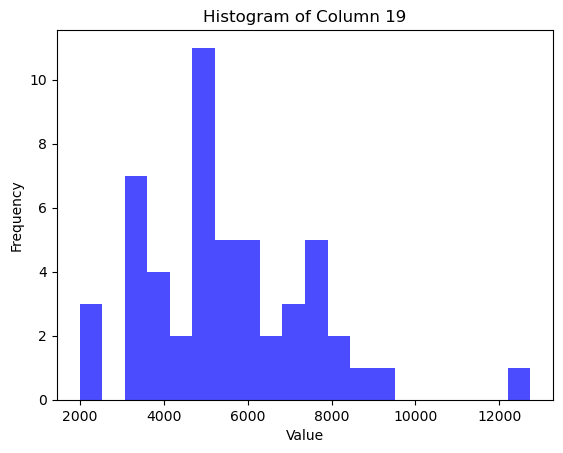

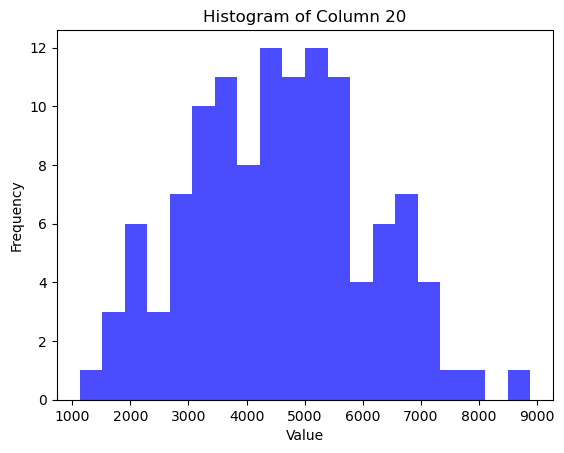

In [ ]:
for i in range(20): #len(tot_res_plus)
    plt.figure()
    plt.hist(tot_res_plus[i], bins=20, alpha=0.7, color='blue')
    plt.title(f'Histogram of Column {i+1}')
    plt.xlabel('Value')
    plt.ylabel('Frequency')
    plt.show()

In [ ]:
trad_list_cond_plus = pd.DataFrame([[i, plus_data.columns[i]] for i in range(len(plus_data.columns))])
trad_list_cond_plus = trad_list_cond_plus.set_index(1)

trad_list_cond_minus = pd.DataFrame([[i, minus_data.columns[i]] for i in range(len(minus_data.columns))])
trad_list_cond_minus = trad_list_cond_minus.set_index(1)

trad_list_cond_plus.to_csv("trad_list_plus.csv")
trad_list_cond_minus.to_csv("trad_list_minus.csv")

Lancer le script "MainTestULBMiner.java" sur Eclipse (en changeant l'url de l'input)

In [3]:
output_0 = pd.read_csv("output\output_inputminus_absint_2.txt", sep="#", 
                       index_col=False, header=None, names=["Motifs", "Support", "Utilité"])

In [4]:
output_0

,Motifs,Support,Utilité
0,-16 30 88 31 -6 174 -172 105 -63 -33 53 -167 1...,SUP: 1,UTIL: 5231
1,-131 -128 -24 30 88 102 99 -52 -63 55 -41 89 -...,SUP: 1,UTIL: 6287
2,5 54 -133 -123 -48 -122 144 42 164 146 40 79 5...,SUP: 1,UTIL: 9289
3,35 163 62 56 -148 -17 74 68 9 -166 34 12 40 -5...,SUP: 1,UTIL: 6137
4,173 -148 152 21 -166 89 53 -167 62 176,SUP: 2,UTIL: 5824
...,...,...,...
3103,62 -166 -148 -119 -158 -17 147 9 74 152,SUP: 2,UTIL: 5794
3104,62 -166 -148 -119 -158 -17 147 9 152,SUP: 3,UTIL: 7029
3105,62 -166 -148 -119 -158 -17 74 9,SUP: 3,UTIL: 5577
3106,62 -166 -148 -119 -158 -17 152,SUP: 4,UTIL: 6508


In [81]:
output_0["Support"] = output_0["Support"].str.replace("SUP: ", "").astype(int)
output_0["Utilité"] = output_0["Utilité"].str.replace("UTIL: ", "").astype(int)
output_0["Utilité"] = output_0["Utilité"]/output_0["Support"]

In [82]:
output_0.sort_values("Support", ascending=False).head(20)

,Motifs,Support,Utilité
1306,-113 -166 -116 -167 9,13,783.0
2952,-116 -166 -167 -158 11 9,12,946.0
1222,-113 -166 112 9,12,462.0
784,117 -166 118 -17 9,11,703.0
1220,-113 -166 112 152 9,10,1124.0
1693,-96 -166 112 9,10,589.0
2150,-26 177 -166 21 9,10,588.0
790,117 -166 118 68 9,10,1715.0
3043,-126 -167 -119 11 147 -166,10,885.0
1720,-96 -166 127 -17 9,9,931.0


In [83]:
output_show = output_0.copy()
output_show["Support"] = np.round((output_show["Support"]/cond_PLM_Pres_creat("DROUGHT__Col0_stress / Col0", plus_data).shape[0])*100, 2)

In [84]:
output_show.sort_values("Support", ascending=False).head(20)

,Motifs,Support,Utilité
1306,-113 -166 -116 -167 9,2.59,783.0
2952,-116 -166 -167 -158 11 9,2.39,946.0
1222,-113 -166 112 9,2.39,462.0
784,117 -166 118 -17 9,2.19,703.0
1220,-113 -166 112 152 9,1.99,1124.0
1693,-96 -166 112 9,1.99,589.0
2150,-26 177 -166 21 9,1.99,588.0
790,117 -166 118 68 9,1.99,1715.0
3043,-126 -167 -119 11 147 -166,1.99,885.0
1720,-96 -166 127 -17 9,1.79,931.0


A partir de cet output, on effectue 2 analyse :
- En prenant les clusters déterminé par la méthode de Clustering, on va extraire toutes les combinaisons de PLM en commun avec toutes les conditions dans ce cluster
- On fait pareille mais avec les cluster déterminer par les commanditaires

### Méthode Clustering

In [36]:
# Exemple avec les cluster de forte valeur de silhouette

cluster_1 = ['DROUGHT_1101', 'DROUGHT_1104', 'DROUGHT_1980', 'DROUGHT_1976', 'DROUGHT_855', 'DROUGHT_859', 'DROUGHT_323', 'DROUGHT_514', 'GAMMA_494', 'GAMMA_491', 'GAMMA_498', 'GAMMA_492', 'GAMMA_506', 'GAMMA_501', 'GAMMA_510', 'GAMMA_505', 'GAMMA_2643', 'GAMMA_2637', 'GAMMA_2642', 'GAMMA_2638', 'HEAVY.METAL_193', 'HEAVY.METAL_191', 'HEAVY.METAL_612', 'HEAVY.METAL_611', 'HEAVY.METAL_609', 'HEAVY.METAL_571', 'HEAVY.METAL_555', 'HEAVY.METAL_566', 'HEAVY.METAL_558', 'HEAVY.METAL_556', 'HEAVY.METAL_561', 'HEAVY.METAL_903', 'HEAVY.METAL_902', 'HEAVY.METAL_680', 'HEAVY.METAL_201', 'HEAVY.METAL_218', 'HEAVY.METAL_207', 'HEAVY.METAL_212', 'HEAVY.METAL_214', 'HEAVY.METAL_215', 'HEAVY.METAL_203', 'HEAVY.METAL_208', 'NITROGEN_2471', 'NITROGEN_2404', 'NITROGEN_2405', 'NITROGEN_2491', 'NITROGEN_2487', 'NITROGEN_527', 'NITROGEN_2266', 'NITROGEN_2391', 'NITROGEN_2473', 'NITROGEN_2489', 'NITROGEN_2490', 'NITROGEN_2493', 'NITROGEN_1447', 'NITROGEN_1457', 'NITROGEN_1458', 'NITROGEN_1446', 'OTHER-ABIOTIC_1010', 'OTHER-ABIOTIC_1009', 'OTHER-ABIOTIC_1533', 'OTHER-ABIOTIC_1534', 'OXYDATIVE.STRESS_106', 'SALT_1261', 'SALT_1260', 'SALT_1265', 'SALT_1269', 'SALT_1266', 'SALT_1267', 'SALT_1366', 'TEMPERATURE_1571', 'TEMPERATURE_1423', 'TEMPERATURE_1422', 'TEMPERATURE_1424', 'TEMPERATURE_1419', 'TEMPERATURE_1420', 'TEMPERATURE_2519', 'TEMPERATURE_2522', 'TEMPERATURE_2525', 'TEMPERATURE_2526', 'TEMPERATURE_750', 'TEMPERATURE_757', 'TEMPERATURE_749', 'TEMPERATURE_746', 'TEMPERATURE_871', 'TEMPERATURE_1992', 'TEMPERATURE_1994', 'BIOTROPHIC.BACTERIA_125', 'BIOTROPHIC.BACTERIA_246', 'BIOTROPHIC.BACTERIA_250', 'BIOTROPHIC.BACTERIA_247', 'BIOTROPHIC.BACTERIA_248', 'BIOTROPHIC.BACTERIA_249', 'BIOTROPHIC.BACTERIA_252', 'BIOTROPHIC.BACTERIA_1414', 'BIOTROPHIC.BACTERIA_2909', 'FUNGI_622', 'FUNGI_893', 'FUNGI_318', 'FUNGI_1879', 'FUNGI_1885', 'FUNGI_1884', 'FUNGI_1878', 'FUNGI_1874', 'FUNGI_1880', 'NECROTROPHIC.BACTERIA_884', 'NECROTROPHIC.BACTERIA_1231', 'NECROTROPHIC.BACTERIA_1232', 'NECROTROPHIC.BACTERIA_1714', 'NECROTROPHIC.BACTERIA_1718', 'NECROTROPHIC.BACTERIA_1722', 'NECROTROPHIC.BACTERIA_1715', 'NECROTROPHIC.BACTERIA_2900', 'NECROTROPHIC.BACTERIA_2901', 'NECROTROPHIC.BACTERIA_2896', 'NEMATODES_32', 'NEMATODES_39', 'OOMYCETE_115', 'OOMYCETE_120', 'OOMYCETE_116', 'OOMYCETE_121', 'OOMYCETE_118', 'OOMYCETE_123', 'OOMYCETE_1356', 'OOMYCETE_1357', 'OOMYCETE_1358', 'OOMYCETE_1359', 'OTHER-BIOTIC_2279', 'OTHER-BIOTIC_2280', 'OTHER-BIOTIC_2278', 'RHODOCOCCUS_1858', 'RHODOCOCCUS_1860', 'RHODOCOCCUS_1864', 'RHODOCOCCUS_1845', 'RHODOCOCCUS_1847', 'RHODOCOCCUS_1849', 'STIFENIA_665', 'STIFENIA_663', 'STIFENIA_664', 'STIFENIA_666', 'STIFENIA_662', 'VIRUS_1665', 'VIRUS_1666', 'VIRUS_1664', 'VIRUS_187', 'VIRUS_242', 'VIRUS_183', 'VIRUS_186', 'VIRUS_1562', 'VIRUS_1564', 'VIRUS_1565', 'VIRUS_797', 'VIRUS_800']

Cluster_2 = ['HEAVY.METAL_568', 'NITROGEN_297', 'NITROGEN_298', 'NITROGEN_530', 'NITROGEN_302', 'BIOTROPHIC.BACTERIA_270', 'BIOTROPHIC.BACTERIA_346', 'BIOTROPHIC.BACTERIA_267', 'BIOTROPHIC.BACTERIA_264', 'BIOTROPHIC.BACTERIA_265', 'BIOTROPHIC.BACTERIA_266', 'BIOTROPHIC.BACTERIA_345', 'BIOTROPHIC.BACTERIA_268', 'BIOTROPHIC.BACTERIA_347', 'BIOTROPHIC.BACTERIA_1412', 'BIOTROPHIC.BACTERIA_1409', 'BIOTROPHIC.BACTERIA_1407', 'BIOTROPHIC.BACTERIA_1410', 'BIOTROPHIC.BACTERIA_2905']

Cluster_5 = ['TEMPERATURE_869', 'TEMPERATURE_864', 'TEMPERATURE_865', 'TEMPERATURE_860', 'TEMPERATURE_866', 'BIOTROPHIC.BACTERIA_1866', 'NECROTROPHIC.BACTERIA_2897', 'OTHER-BIOTIC_2277', 'VIRUS_1478', 'VIRUS_1553', 'VIRUS_1554', 'VIRUS_1557', 'VIRUS_1558', 'VIRUS_1566']

Cluster_9 = ['NEMATODES_33', 'NEMATODES_36', 'NEMATODES_221', 'NEMATODES_35', 'NEMATODES_37', 'NEMATODES_40']


In [37]:
# Autre cluster

Cluster_0 = ['DROUGHT_29', 'DROUGHT_30', 'DROUGHT_512', 'HEAVY.METAL_610', 'HEAVY.METAL_570', 'HEAVY.METAL_565', 'HEAVY.METAL_564', 'HEAVY.METAL_560', 'HEAVY.METAL_237', 'HEAVY.METAL_235', 'HEAVY.METAL_238', 'HEAVY.METAL_213', 'NITROGEN_306', 'NITROGEN_308', 'NITROGEN_2403', 'NITROGEN_2406', 'NITROGEN_2488', 'NITROGEN_529', 'NITROGEN_2265', 'NITROGEN_2394', 'NITROGEN_2474', 'OTHER-ABIOTIC_1929', 'OTHER-ABIOTIC_1931', 'OTHER-ABIOTIC_1930', 'OTHER-ABIOTIC_1932', 'OXYDATIVE.STRESS_107', 'OXYDATIVE.STRESS_108', 'OXYDATIVE.STRESS_109', 'OXYDATIVE.STRESS_166', 'OXYDATIVE.STRESS_165', 'OXYDATIVE.STRESS_337', 'SALT_1401', 'SALT_1402', 'SALT_1400', 'SALT_1371', 'SALT_1365', 'SALT_1369', 'TEMPERATURE_2517', 'TEMPERATURE_2524', 'TEMPERATURE_747', 'TEMPERATURE_862', 'TEMPERATURE_868', 'BIOTROPHIC.BACTERIA_129', 'BIOTROPHIC.BACTERIA_269', 'BIOTROPHIC.BACTERIA_222', 'FUNGI_1406', 'NECROTROPHIC.BACTERIA_1716', 'NEMATODES_38', 'VIRUS_1555', 'VIRUS_1556', 'VIRUS_1563', 'VIRUS_796', 'VIRUS_801']

Cluster_3 = ['DROUGHT_1977', 'DROUGHT_1973', 'DROUGHT_1974', 'DROUGHT_511', 'HEAVY.METAL_236', 'HEAVY.METAL_210', 'NITROGEN_305', 'NITROGEN_307', 'NITROGEN_299', 'NITROGEN_300', 'NITROGEN_303', 'NITROGEN_304', 'NITROGEN_2264', 'TEMPERATURE_861', 'TEMPERATURE_867', 'TEMPERATURE_863', 'BIOTROPHIC.BACTERIA_1867', 'FUNGI_1872', 'VIRUS_1479', 'VIRUS_179', 'VIRUS_182', 'VIRUS_1296', 'VIRUS_1672']

Cluster_4 = ['GAMMA_502', 'GAMMA_2641', 'HEAVY.METAL_557', 'HEAVY.METAL_567', 'NITROGEN_2393', 'NITROGEN_2262', 'NITROGEN_1456', 'SALT_1262', 'SALT_1268', 'TEMPERATURE_172', 'TEMPERATURE_760', 'TEMPERATURE_761', 'TEMPERATURE_763', 'TEMPERATURE_762', 'TEMPERATURE_870', 'BIOTROPHIC.BACTERIA_128', 'BIOTROPHIC.BACTERIA_127', 'BIOTROPHIC.BACTERIA_245', 'FUNGI_319', 'FUNGI_1873', 'FUNGI_1871', 'FUNGI_1882', 'FUNGI_1875', 'NECROTROPHIC.BACTERIA_881', 'NECROTROPHIC.BACTERIA_2898', 'NEMATODES_34', 'OOMYCETE_117', 'OOMYCETE_122', 'OOMYCETE_119', 'OOMYCETE_124', 'RHODOCOCCUS_1853', 'STIFENIA_661']

Cluster_6 = ['DROUGHT_321', 'GAMMA_499', 'GAMMA_500', 'GAMMA_495', 'GAMMA_503', 'GAMMA_508', 'GAMMA_504', 'GAMMA_509', 'GAMMA_2639', 'GAMMA_2640', 'GAMMA_2644', 'HEAVY.METAL_192', 'HEAVY.METAL_608', 'HEAVY.METAL_559', 'HEAVY.METAL_563', 'HEAVY.METAL_677', 'HEAVY.METAL_678', 'HEAVY.METAL_679', 'HEAVY.METAL_199', 'HEAVY.METAL_204', 'NITROGEN_2392', 'NITROGEN_779', 'NITROGEN_2395', 'NITROGEN_782', 'NITROGEN_1451', 'OXYDATIVE.STRESS_334', 'OXYDATIVE.STRESS_336', 'TEMPERATURE_1421', 'TEMPERATURE_2516', 'TEMPERATURE_2521', 'TEMPERATURE_2520', 'TEMPERATURE_2518', 'TEMPERATURE_2523', 'TEMPERATURE_755', 'TEMPERATURE_751', 'TEMPERATURE_752', 'BIOTROPHIC.BACTERIA_126', 'BIOTROPHIC.BACTERIA_1411', 'BIOTROPHIC.BACTERIA_2904', 'BIOTROPHIC.BACTERIA_2907', 'BIOTROPHIC.BACTERIA_2908', 'FUNGI_623', 'FUNGI_1877', 'NECROTROPHIC.BACTERIA_1228', 'NECROTROPHIC.BACTERIA_1719', 'NECROTROPHIC.BACTERIA_2899', 'OTHER-BIOTIC_2276', 'OTHER-BIOTIC_2275', 'VIRUS_1480', 'VIRUS_1567', 'VIRUS_799', 'VIRUS_798', 'VIRUS_1677']

Cluster_7 = ['GAMMA_490', 'NITROGEN_1444', 'NITROGEN_1450', 'OXYDATIVE.STRESS_170', 'OXYDATIVE.STRESS_332', 'OXYDATIVE.STRESS_335', 'BIOTROPHIC.BACTERIA_223', 'NECROTROPHIC.BACTERIA_879', 'NECROTROPHIC.BACTERIA_883', 'NECROTROPHIC.BACTERIA_882', 'NECROTROPHIC.BACTERIA_885', 'NECROTROPHIC.BACTERIA_880', 'NECROTROPHIC.BACTERIA_886', 'NECROTROPHIC.BACTERIA_1229', 'NECROTROPHIC.BACTERIA_1230', 'NECROTROPHIC.BACTERIA_1233']

Cluster_8 = ['DROUGHT_1978', 'OXYDATIVE.STRESS_167', 'OXYDATIVE.STRESS_169', 'OXYDATIVE.STRESS_168', 'OXYDATIVE.STRESS_333', 'UV_1346', 'UV_1342', 'UV_1351', 'UV_1345', 'UV_1341', 'UV_1353', 'UV_1352', 'BIOTROPHIC.BACTERIA_1901', 'BIOTROPHIC.BACTERIA_1865', 'BIOTROPHIC.BACTERIA_2906', 'FUNGI_621', 'FUNGI_891', 'FUNGI_313']

In [234]:
trad_cond = pd.read_csv("trad_list_plus.csv", index_col=0)

Info_allswap["swap_clust"] = Info_allswap["StressName"] + "_" + Info_allswap["swap_id"].astype(str)

cluster_trad_inter = [Info_allswap[Info_allswap["swap_clust"] == c]["uniq_name"].values[0] for c in Cluster_8]
cluster_trad = [trad_cond.loc[n].values[0] for n in cluster_trad_inter]

cluster_trad

[8,
 145,
 146,
 147,
 151,
 217,
 218,
 219,
 220,
 221,
 222,
 223,
 252,
 253,
 259,
 264,
 265,
 266]

In [235]:
for c in range(len(cluster_trad)):
    name = "output\output_inputminus_absint_" + str(cluster_trad[c]) + ".txt"
    if (os.path.exists(name)):
        output = pd.read_csv(name, sep="#", index_col=False, header=None, names=["Motifs", "Support", "Utilité"])
    else:
        continue
    mot_out = set(output["Motifs"].str.replace("-", ""))
    if cluster_trad[0] == cluster_trad[c]:
        PLM_rest = mot_out
        print(len(PLM_rest))
    else :
        PLM_rest = PLM_rest & mot_out
        print(len(PLM_rest))

PLM_rest

2293
1
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0
0


set()

Pour beaucoup de cluster on retrouve aucune combinaison de PLM en commun entre les stress dans ce cluster.  
On va donc effectuer le compte des combinaison de PLM des stress dans les clusters.

In [39]:
from collections import Counter
import os

In [36]:
# trad_cond = pd.read_csv("trad_list_plus.csv", index_col=0)

# Info_allswap["swap_clust"] = Info_allswap["StressName"] + "_" + Info_allswap["swap_id"].astype(str)

# cluster_trad_inter = [Info_allswap[Info_allswap["swap_clust"] == c]["uniq_name"].values[0] for c in cluster_1]
# cluster_trad = [trad_cond.loc[n].values[0] for n in cluster_trad_inter]

# cluster_trad

NameError: name 'cluster_1' is not defined

In [ ]:
# cluster_1 / Cluster_2 / Cluster_5 / Cluster_9
# Cluster_0 / Cluster_3 / Cluster_4 / Cluster_6 / Cluster_7 / Cluster_8

In [40]:
trad_cond = pd.read_csv("trad_list_plus.csv", index_col=0)

Info_allswap["swap_clust"] = Info_allswap["StressName"] + "_" + Info_allswap["swap_id"].astype(str)

cluster_trad_inter = [Info_allswap[Info_allswap["swap_clust"] == c]["uniq_name"].values[0] for c in Cluster_5]
cluster_trad = [trad_cond.loc[n].values[0] for n in cluster_trad_inter]

print("Nombre de stress dans le cluster :", len(cluster_trad))

count_PLM = []
for c in range(len(cluster_trad)):
    name = "output\output_inputminus_absint_" + str(cluster_trad[c]) + ".txt"
    if (os.path.exists(name)):
        output = pd.read_csv(name, sep="#", index_col=False, header=None, names=["Motifs", "Support", "Utilité"])
    else:
        continue
    mot_out = set(output["Motifs"].str.replace("-", ""))
    for o in mot_out:
        count_PLM.append(o)

count_PLM = pd.DataFrame.from_dict(Counter(count_PLM), orient='index', columns=['Count'])
count_PLM = count_PLM.sort_values("Count", ascending=False)
count_PLM["Count_percentage"] = count_PLM["Count"] / len(cluster_trad)
count_PLM

Nombre de stress dans le cluster : 14


,Count,Count_percentage
120 166 167 11 21 9,7,0.500000
124 166 167 158 11 9,5,0.357143
120 166 167 17 11 21 9,5,0.357143
124 166 167 17 11 9,4,0.285714
114 166 172 126 147 158 11 68,4,0.285714
...,...,...
127 126 166 148 176 9 68,1,0.071429
124 166 113 26 62 148 119 17 68 11 9,1,0.071429
135 166 126 148 176 17 147 11,1,0.071429
138 140 166 137 139 143 126 152 119 17 158 11,1,0.071429


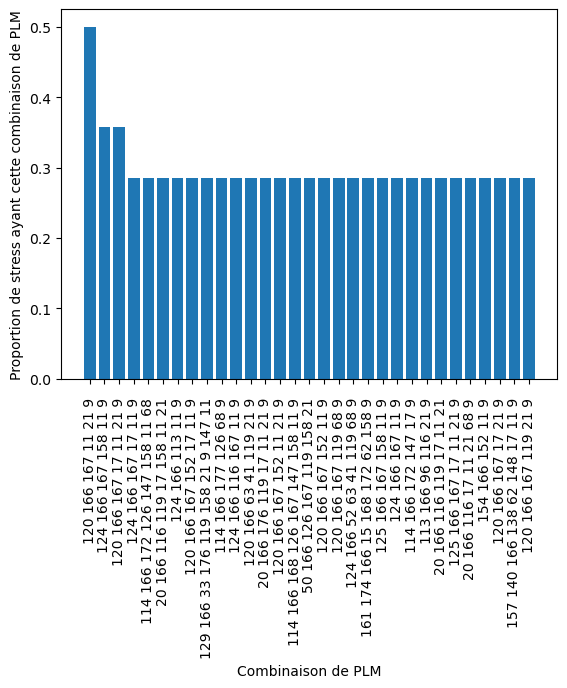

In [41]:
plt.figure()
plt.bar(count_PLM[count_PLM["Count"] > 3].index, count_PLM[count_PLM["Count"] > 3]["Count_percentage"])
plt.xticks(rotation=90, fontsize = 10)
plt.xlabel("Combinaison de PLM")
plt.ylabel("Proportion de stress ayant cette combinaison de PLM")
plt.show()

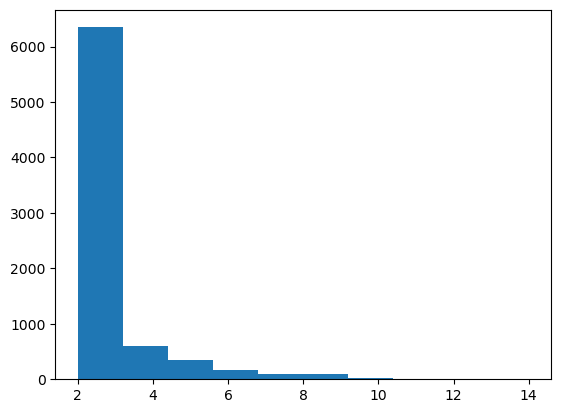

In [52]:
plt.figure()
plt.hist(count_PLM[count_PLM["Count"] > 1]["Count"])
plt.show()

### Méthode Commanditaire

In [ ]:
cluster = Info_allswap[Info_allswap["StressName"] == "OTHER-BIOTIC"]["uniq_name"]
trad_cond = pd.read_csv("trad_list_plus.csv", index_col=0)

cluster_trad = [trad_cond.loc[c].values[0] for c in cluster]
cluster_trad

[335, 336, 337, 338, 339, 340]

In [ ]:
for c in range(len(cluster_trad)):
    name = "output\output_inputminus_absint_" + str(cluster_trad[c]) + ".txt"
    if (os.path.exists(name)):
        output = pd.read_csv(name, sep="#", index_col=False, header=None, names=["Motifs", "Support", "Utilité"])
    else:
        continue
    mot_out = set(output["Motifs"].str.replace("-", ""))
    if cluster_trad[0] == cluster_trad[c]:
        PLM_rest = mot_out
        print(len(PLM_rest))
    else :
        PLM_rest = PLM_rest & mot_out
        print(len(PLM_rest))

PLM_rest

85
0
0
0
0
0


set()

In [ ]:
np.unique(Info_allswap["StressName"])
#"UV" 'NEMATODES' "OTHER-ABIOTIC" 

array(['BIOTROPHIC.BACTERIA', 'DROUGHT', 'FUNGI', 'GAMMA', 'HEAVY.METAL',
       'NECROTROPHIC.BACTERIA', 'NEMATODES', 'NITROGEN', 'OOMYCETE',
       'OTHER-ABIOTIC', 'OTHER-BIOTIC', 'OXYDATIVE.STRESS', 'RHODOCOCCUS',
       'SALT', 'STIFENIA', 'TEMPERATURE', 'UV', 'VIRUS'], dtype=object)

In [101]:
cluster = Info_allswap[Info_allswap["StressName"] == "UV"]["uniq_name"]
trad_cond = pd.read_csv("trad_list_plus.csv", index_col=0)

cluster_trad = [trad_cond.loc[c].values[0] for c in cluster]
print("Nombre de stress dans le cluster :", len(cluster_trad))

count_PLM = []
for c in range(len(cluster_trad)):
    name = "output\output_inputminus_absint_" + str(cluster_trad[c]) + ".txt"
    if (os.path.exists(name)):
        output = pd.read_csv(name, sep="#", index_col=False, header=None, names=["Motifs", "Support", "Utilité"])
    else:
        continue
    mot_out = set(output["Motifs"].str.replace("-", ""))
    for o in mot_out:
        count_PLM.append(o)

count_PLM = pd.DataFrame.from_dict(Counter(count_PLM), orient='index', columns=['Count'])
count_PLM = count_PLM.sort_values("Count", ascending=False)
count_PLM["Count_percentage"] = count_PLM["Count"] / len(cluster_trad)
count_PLM

Nombre de stress dans le cluster : 7


,Count,Count_percentage
6 166 126 167 176 21,5,0.714286
117 166 118 63 41 158 21,5,0.714286
6 166 176 68 9,5,0.714286
117 166 118 158 11 21,4,0.571429
157 140 166 116 33 176 9,4,0.571429
...,...,...
125 166 116 126 148 152 11 21,1,0.142857
117 166 52 63 41 176 119 147 21 9,1,0.142857
124 166 145 141 138 137 139 143 140 158 21 157 165 130 126 176 74 147 68,1,0.142857
168 166 172 126 167 176 119 21,1,0.142857


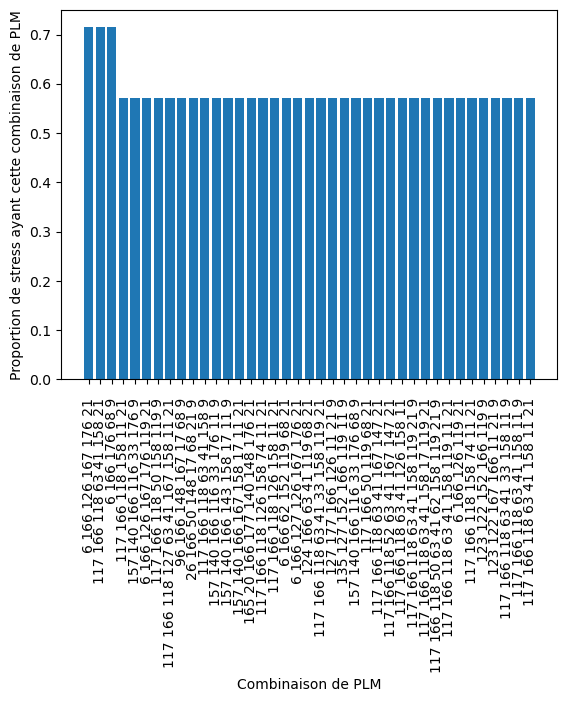

In [102]:
plt.figure()
plt.bar(count_PLM[count_PLM["Count"] > 3].index, count_PLM[count_PLM["Count"] > 3]["Count_percentage"])
plt.xticks(rotation=90, fontsize = 10)
plt.xlabel("Combinaison de PLM")
plt.ylabel("Proportion de stress ayant cette combinaison de PLM")
plt.show()

NE PAS OUBLIER :
- Probleme dans le nombre de gene pris en compte = Si trop petit (donc peu de transaction alors l'approche n'amène a pas grand chose)